In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
!pip install missingno
import missingno as msno

In [3]:
df = pd.read_csv('swiggy_cleaned_data.csv')
df.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,INDO,19,3,Saturday,True,15.0,11.0,morning,3.025149
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,BANG,25,3,Friday,False,5.0,19.0,night,20.183530
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,BANG,19,3,Saturday,True,15.0,8.0,morning,1.552758
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,COIMB,5,4,Tuesday,False,10.0,18.0,evening,7.790401
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,CHEN,26,3,Saturday,True,15.0,13.0,afternoon,6.210138


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43648 non-null  float64
 1   ratings              43594 non-null  float64
 2   weather              44977 non-null  object 
 3   traffic              44992 non-null  object 
 4   vehicle_condition    45502 non-null  int64  
 5   type_of_order        45502 non-null  object 
 6   type_of_vehicle      45502 non-null  object 
 7   multiple_deliveries  44509 non-null  float64
 8   festival             45274 non-null  object 
 9   city_type            44304 non-null  object 
 10  time_taken           45502 non-null  float64
 11  city_name            45502 non-null  object 
 12  day                  45502 non-null  int64  
 13  month                45502 non-null  int64  
 14  day_of_week          45502 non-null  object 
 15  is_weekend           45502 non-null 

In [5]:
df.duplicated().sum()


0

In [6]:
df.isnull().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
day                       0
month                     0
day_of_week               0
is_weekend                0
pickup_time            1640
order_time_hour        1640
order_time_of_day      1640
distance               3630
dtype: int64

In [7]:
df.isnull().sum().sum()

15766

In [8]:
df.shape

(45502, 20)

In [9]:
df.isnull().any(axis=1).sum()

7438

Out of a total of 45,502 rows, 7,438 rows contain at least one missing (null) value across the 29 columns.

This means approximately 16.3% of the dataset has incomplete records that may require cleaning or imputation.

In [10]:
df1 = df.copy()

In [11]:
df1.shape

(45502, 20)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43648 non-null  float64
 1   ratings              43594 non-null  float64
 2   weather              44977 non-null  object 
 3   traffic              44992 non-null  object 
 4   vehicle_condition    45502 non-null  int64  
 5   type_of_order        45502 non-null  object 
 6   type_of_vehicle      45502 non-null  object 
 7   multiple_deliveries  44509 non-null  float64
 8   festival             45274 non-null  object 
 9   city_type            44304 non-null  object 
 10  time_taken           45502 non-null  float64
 11  city_name            45502 non-null  object 
 12  day                  45502 non-null  int64  
 13  month                45502 non-null  int64  
 14  day_of_week          45502 non-null  object 
 15  is_weekend           45502 non-null 

In [13]:
def value_counts_for_object_columns(df, return_dict=False):
  
    object_cols = df.select_dtypes(include='object').columns
    value_counts_dict = {}

    for col in object_cols:
        print(f"\n--- Value Counts for '{col}' ---")
        print(df[col].value_counts(dropna=False))
        value_counts_dict[col] = df[col].value_counts(dropna=False)

    if return_dict:
        return value_counts_dict


In [14]:
value_counts_for_object_columns(df1)


--- Value Counts for 'weather' ---
fog           7654
stormy        7586
cloudy        7536
sandstorms    7495
windy         7422
sunny         7284
NaN            525
Name: weather, dtype: int64

--- Value Counts for 'traffic' ---
low       15477
jam       14143
medium    10947
high       4425
NaN         510
Name: traffic, dtype: int64

--- Value Counts for 'type_of_order' ---
snack     11512
meal      11435
drinks    11294
buffet    11261
Name: type_of_order, dtype: int64

--- Value Counts for 'type_of_vehicle' ---
motorcycle          26427
scooter             15244
electric_scooter     3778
bicycle                53
Name: type_of_vehicle, dtype: int64

--- Value Counts for 'festival' ---
no     44380
yes      894
NaN      228
Name: festival, dtype: int64

--- Value Counts for 'city_type' ---
metropolitian    34029
urban            10111
NaN               1198
semi-urban         164
Name: city_type, dtype: int64

--- Value Counts for 'city_name' ---
JAP       3439
RANCHI    3222
BA

In [15]:
df1.columns.to_list()

['age',
 'ratings',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'time_taken',
 'city_name',
 'day',
 'month',
 'day_of_week',
 'is_weekend',
 'pickup_time',
 'order_time_hour',
 'order_time_of_day',
 'distance']

In [16]:
def fill_missing_mode_median(df, cols):
    df_filled = df.copy()

    for col in cols:
        if df_filled[col].dtype == 'object':
            df_filled[col] = df_filled[col].str.strip()
    
    for col in cols:
        if df_filled[col].dtype == 'object':
            mode_val = df_filled[col].mode(dropna=True)[0]
            df_filled[col] = df_filled[col].fillna(mode_val)
        else:
            median_val = df_filled[col].median()
            df_filled[col] = df_filled[col].fillna(median_val)

    return df_filled



In [17]:
num_cols = [col for col in df1.columns.to_list() if df1[col].dtype != 'object']
num_cols

['age',
 'ratings',
 'vehicle_condition',
 'multiple_deliveries',
 'time_taken',
 'day',
 'month',
 'is_weekend',
 'pickup_time',
 'order_time_hour',
 'distance']

In [18]:
cat_cols = [col for col in df1.columns if df[col].dtype == 'object']
cat_cols

['weather',
 'traffic',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'day_of_week',
 'order_time_of_day']

You're applying .str.strip() to all columns, including numerical ones — this will raise an error for non-string types.

In [19]:
cols_to_fill = df1.columns.to_list()  # or any column list
df_filled = fill_missing_mode_median(df1, cols_to_fill)


In [20]:
df_filled['traffic'].value_counts().index

Index(['low', 'jam', 'medium', 'high'], dtype='object')

In [21]:
df_filled.isnull().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
time_taken             0
city_name              0
day                    0
month                  0
day_of_week            0
is_weekend             0
pickup_time            0
order_time_hour        0
order_time_of_day      0
distance               0
dtype: int64

In [22]:
from sklearn.preprocessing import OrdinalEncoder

custom_orders = {
    'weather': ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
    'traffic': ['Low', 'Medium', 'High', 'Jam'],
    'type_of_order': ['Drinks', 'Snack', 'Meal', 'Buffet'],
    'type_of_vehicle': ['bicycle', 'electric_scooter', 'scooter', 'motorcycle'],
    'city_type': ['Semi-Urban', 'Urban', 'Metropolitian'],
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'order_time_of_day': ['late_night', 'morning', 'afternoon', 'evening', 'night']
}


def encode_with_sklearn_ordinal(df, custom_orders):
    df_encoded = df.copy()
    
    for col, order in custom_orders.items():
        encoder = OrdinalEncoder(categories=[order], handle_unknown='use_encoded_value', unknown_value=-1)
        df_encoded[col] = encoder.fit_transform(df_encoded[[col]])  
        #df_encoded[[col]]: Ensures the column is passed as 2D (which OrdinalEncoder requires).

    return df_encoded


In [23]:
df_encoded = encode_with_sklearn_ordinal(df_filled , custom_orders)

In [24]:
df_encoded.sample(100)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
28416,32.0,4.3,-1.0,-1.0,1,-1.0,2.0,1.0,yes,-1.0,49.0,ALH,14,2,0.0,False,5.0,19.0,4.0,9.193014
28223,31.0,4.9,-1.0,-1.0,0,-1.0,3.0,0.0,no,-1.0,33.0,GOA,11,2,4.0,False,10.0,19.0,4.0,4.632303
37898,39.0,4.6,-1.0,-1.0,0,-1.0,3.0,1.0,no,-1.0,45.0,BANG,23,3,2.0,False,10.0,21.0,4.0,13.973761
23016,25.0,4.9,-1.0,-1.0,0,-1.0,3.0,0.0,no,-1.0,24.0,BANG,23,3,2.0,False,15.0,22.0,4.0,13.973183
15514,29.0,5.0,-1.0,-1.0,2,-1.0,2.0,0.0,no,-1.0,16.0,SUR,13,3,6.0,True,5.0,9.0,1.0,1.520456
6803,24.0,4.8,-1.0,-1.0,1,-1.0,3.0,0.0,no,-1.0,27.0,DEH,18,2,4.0,False,10.0,21.0,4.0,9.193014
4012,37.0,4.6,-1.0,-1.0,2,-1.0,2.0,1.0,no,-1.0,22.0,MYS,4,4,0.0,False,10.0,20.0,4.0,13.990151
38845,37.0,4.6,-1.0,-1.0,2,-1.0,2.0,0.0,no,-1.0,17.0,COIMB,30,3,2.0,False,10.0,23.0,0.0,4.674324
7256,38.0,4.7,-1.0,-1.0,2,-1.0,1.0,1.0,no,-1.0,40.0,MYS,18,3,4.0,False,5.0,18.0,3.0,13.989532
40529,35.0,4.9,-1.0,-1.0,1,-1.0,2.0,1.0,no,-1.0,26.0,DEH,12,2,5.0,True,15.0,17.0,3.0,13.216578


In [25]:
df_filled['traffic'].value_counts()

low       15987
jam       14143
medium    10947
high       4425
Name: traffic, dtype: int64

In [26]:
df_encoded['traffic'].value_counts()

-1.0    45502
Name: traffic, dtype: int64

# Numerical Columns Imputation

<Axes: >

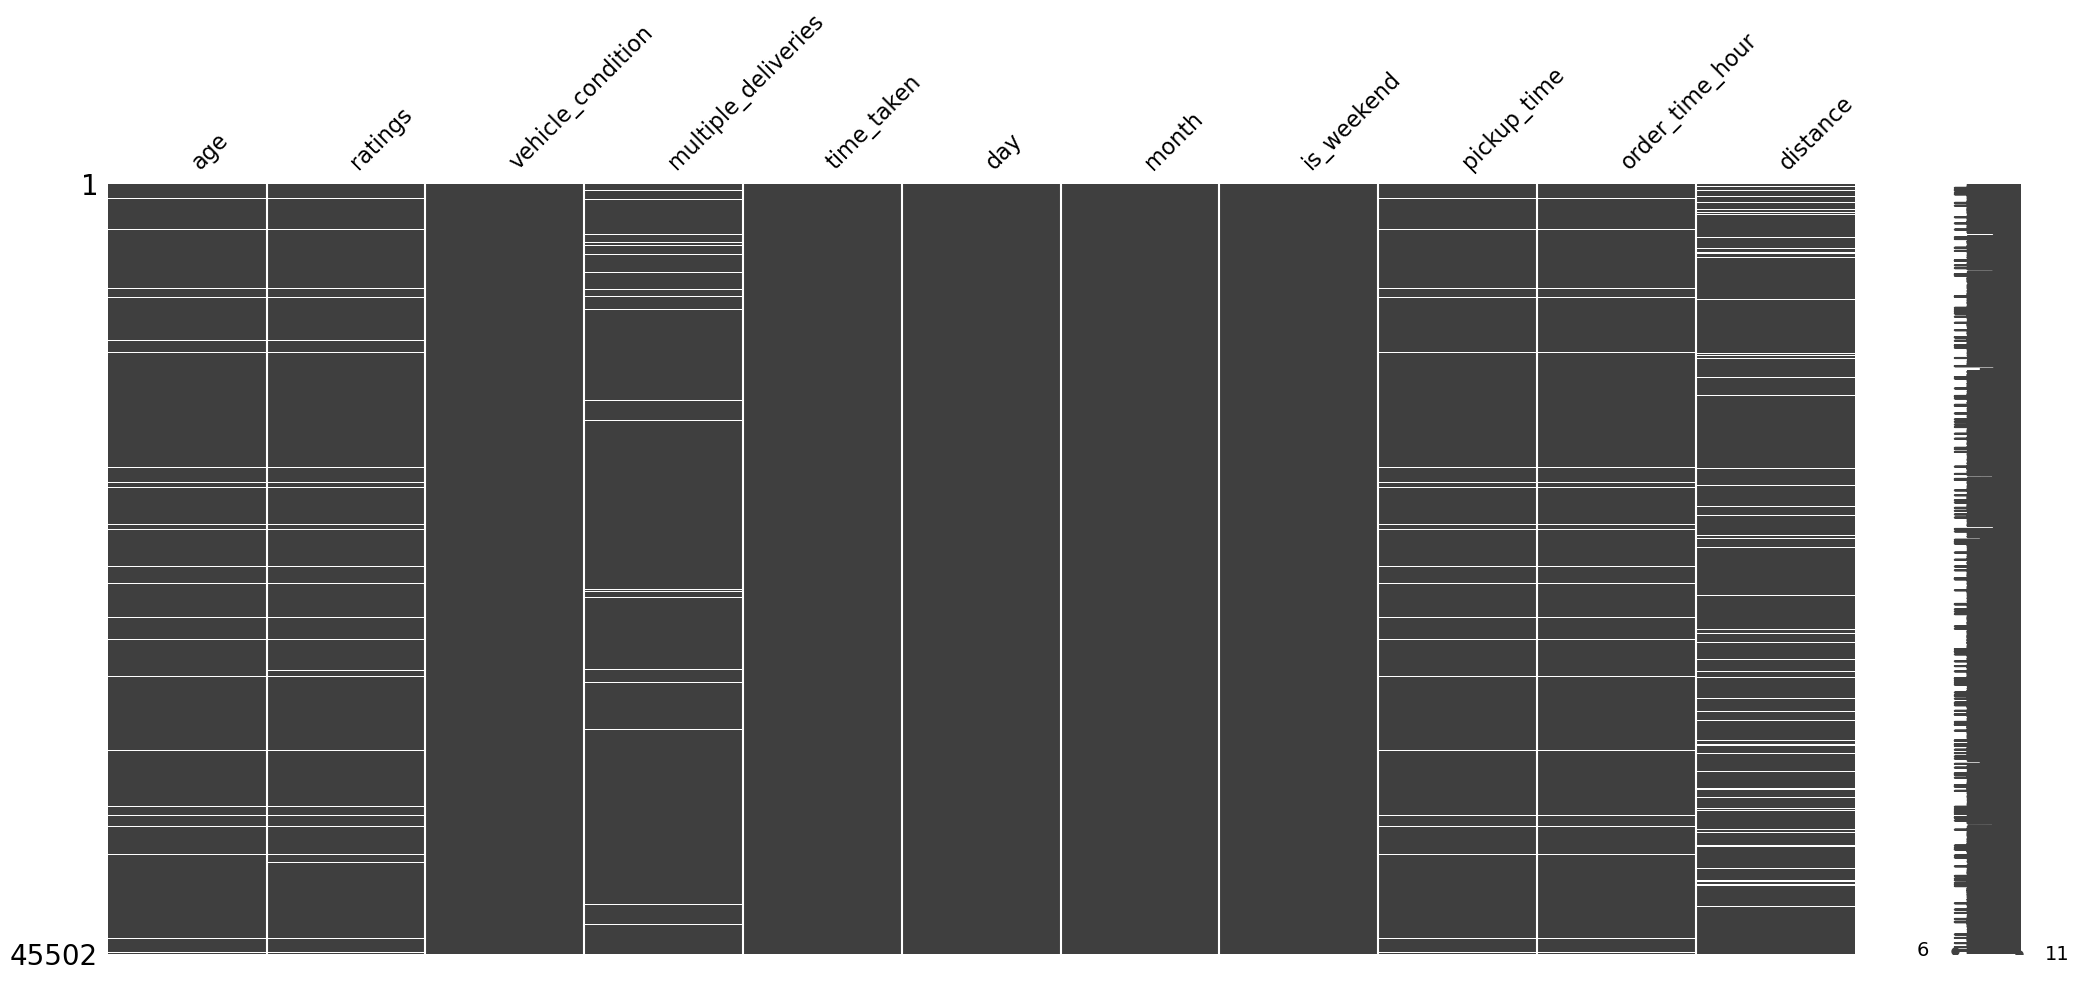

In [27]:
msno.matrix(df1[num_cols])

<Axes: >

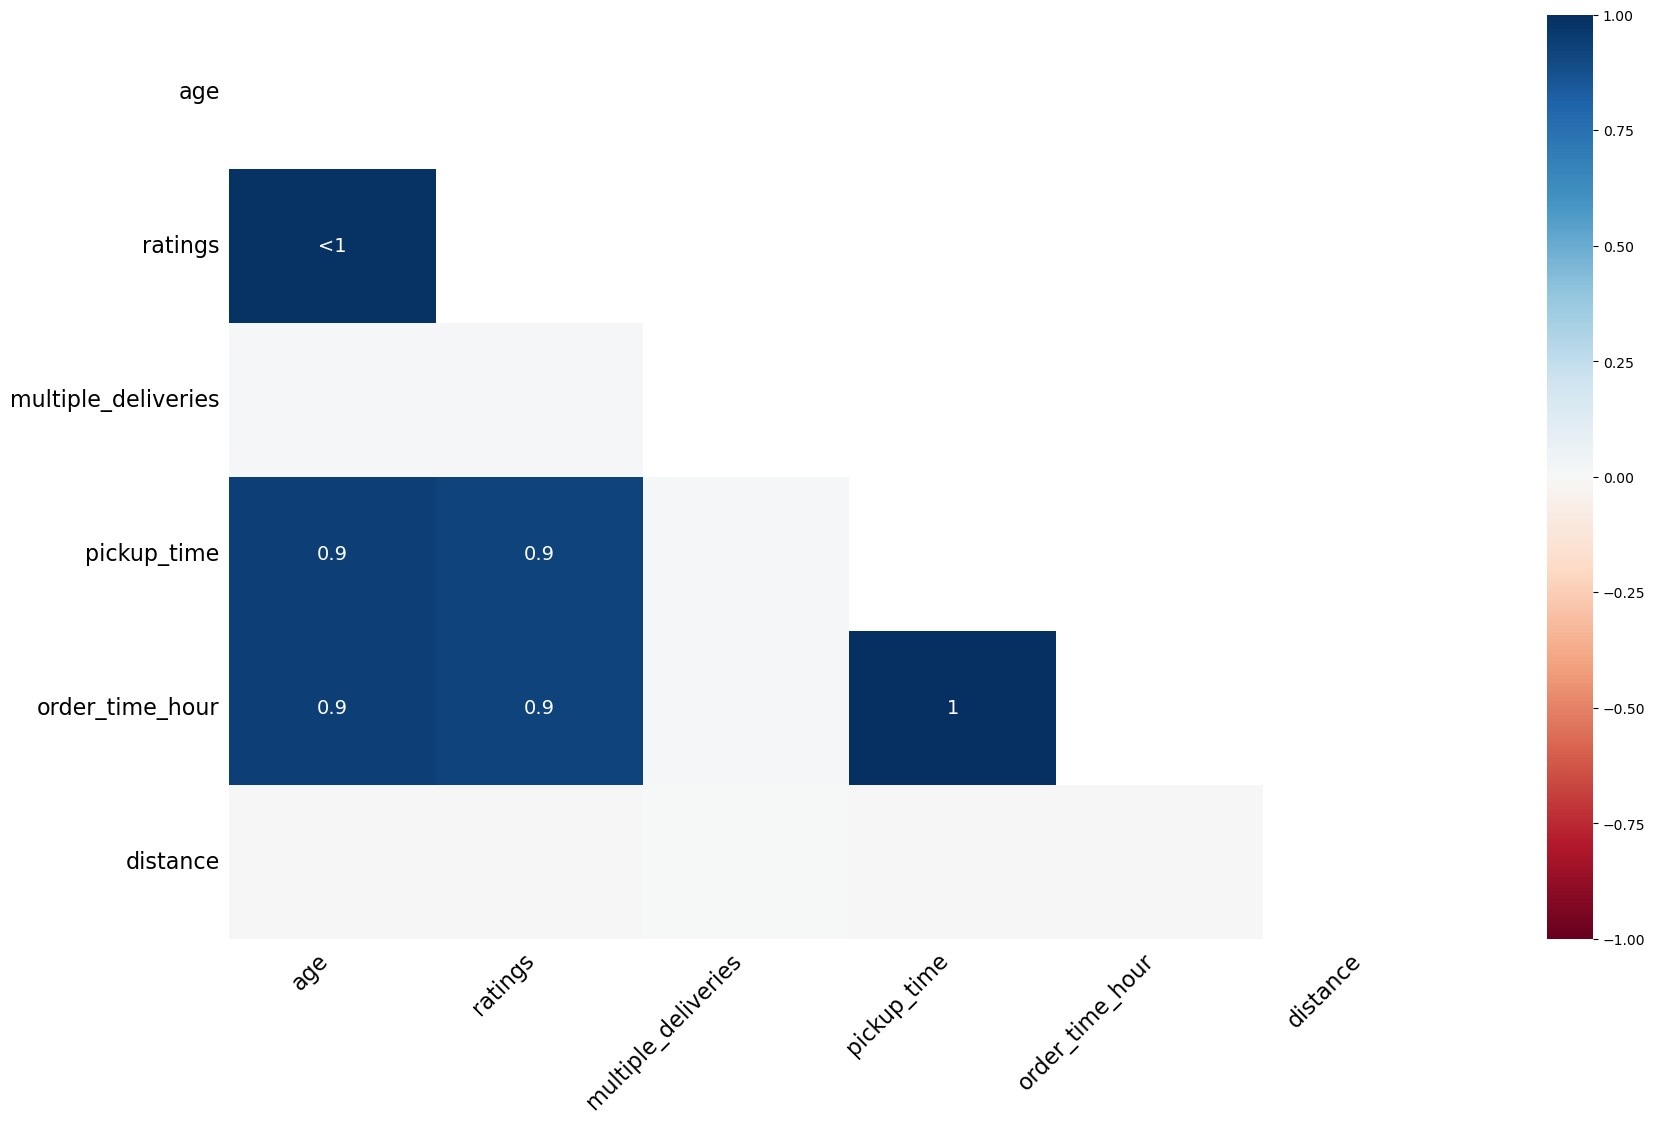

In [28]:
msno.heatmap(df1[num_cols])

We observed that age, ratings, pickup_time, and order_time_hour have missing values that often occur together. This pattern suggests that the missingness is not random, but instead depends on other observed data — a classic case of Missing At Random (MAR).

The missing values in the distance,multiple_deliveries column appear to be independent of any other variable or pattern in the dataset MCAR (Missing Completely At Random).

For example:

When pickup_time is missing, order_time_hour is usually missing too — indicating a link in how the data was collected or processed.

Similarly, age and ratings show related missing patterns, possibly tied to driver or customer data being partially available.

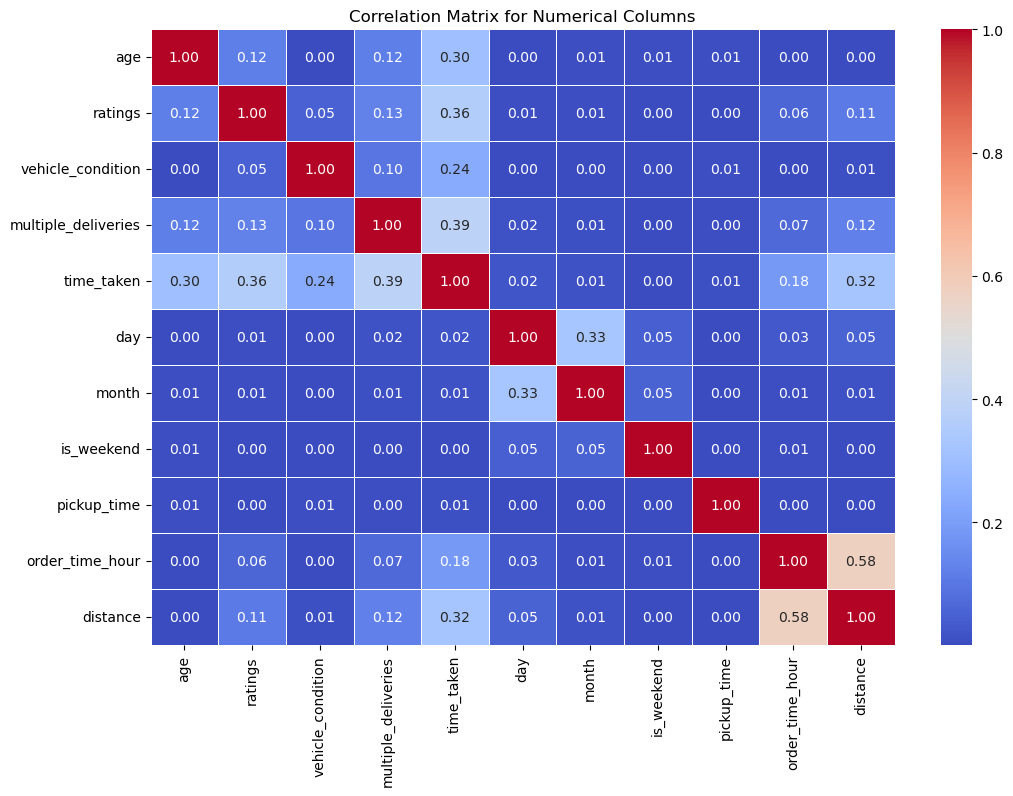

In [29]:
corr_matrix = df1[num_cols].corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

In [30]:
corr_matrix

,age,ratings,vehicle_condition,multiple_deliveries,time_taken,day,month,is_weekend,pickup_time,order_time_hour,distance
age,1.000000,0.117577,0.001791,0.117832,0.303817,0.003874,0.005999,0.006803,0.008163,0.000410,0.001399
ratings,0.117577,1.000000,0.048903,0.126573,0.360980,0.005587,0.005952,0.001346,0.004083,0.061775,0.108677
vehicle_condition,0.001791,0.048903,1.000000,0.096829,0.235125,0.001173,0.002410,0.002493,0.005877,0.002628,0.008665
multiple_deliveries,0.117832,0.126573,0.096829,1.000000,0.387231,0.015371,0.011130,0.003693,0.004466,0.067951,0.124190
time_taken,0.303817,0.360980,0.235125,0.387231,1.000000,0.023676,0.012354,0.003141,0.008478,0.184378,0.320705
day,0.003874,0.005587,0.001173,0.015371,0.023676,1.000000,0.325694,0.046711,0.001656,0.030836,0.051239
month,0.005999,0.005952,0.002410,0.011130,0.012354,0.325694,1.000000,0.053106,0.002564,0.006509,0.014178
is_weekend,0.006803,0.001346,0.002493,0.003693,0.003141,0.046711,0.053106,1.000000,0.003082,0.007562,0.000480
pickup_time,0.008163,0.004083,0.005877,0.004466,0.008478,0.001656,0.002564,0.003082,1.000000,0.002683,0.000603
order_time_hour,0.000410,0.061775,0.002628,0.067951,0.184378,0.030836,0.006509,0.007562,0.002683,1.000000,0.577351


In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time



def impute_mean(df, column, plot=True, imputed=False):
    # Work on a copy of the Series
    original = df[column]  # 1. Extract column as Series

    imputed_array = original.fillna(original.mean())  # 2. Fill missing with mean

    df_imputed = pd.DataFrame(imputed_array, columns=[column], index=df.index)  # 3. Convert back to DataFrame

    # Plot KDE
    if plot:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[column], label='Original (non-NaNs)', linestyle='--', color='gray')
        sns.kdeplot(df_imputed[column], label='Mean Imputed', color='blue')
        plt.title(f'{column} Distribution: Mean Imputation')
        plt.legend()
        plt.grid(True)
        plt.show()

    if imputed:
        return df_imputed
    
   
    
   
    
def impute_median(df, column, plot=True,imputed=False):
    original = df[column].copy()
    imputed_array = original.fillna(original.median())
    
    df_imputed = pd.DataFrame(imputed_array, columns=[column], index=df.index)
    
    if plot:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[column], label='Original (with NaNs)', linestyle='--', color='red')
        sns.kdeplot(df_imputed[column], label='Median Imputed', color='green')
        plt.title(f'{column} Distribution: Median Imputation')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    if imputed:
        return df_imputed
    


def impute_iterative_lgbm(df, column,n_estimators=200,num_cols = None,plot=True, show_time=True,imputed=False):
    start_time = time.time()
    
    if num_cols is None:
        num_cols = [col for col in df1.columns.to_list() if df1[col].dtype != 'object']
    
    df_copy = df[num_cols].copy()

    # LightGBM estimator
    lgbm_estimator = LGBMRegressor(n_estimators=n_estimators,
                                   learning_rate=0.02,
                                   random_state=42,
                                   verbose=-1
                                  )

    # Iterative Imputer
    imp = IterativeImputer(estimator=lgbm_estimator,
                           initial_strategy='median',
                           tol=1e-1,
                           max_iter=10,
                           verbose=0,
                           random_state=0)

    # Fit & transform
    imputed_array = imp.fit_transform(df_copy)
    df_imputed = pd.DataFrame(imputed_array, columns=df_copy.columns, index=df.index)

    # Plot KDE
    if plot:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[column].dropna(), label='Original (non-NaNs)', linestyle='--', color='gray')
        sns.kdeplot(df_imputed[column], label='LGBM Imputed', color='green')
        plt.title(f'{column} Distribution: LGBM Imputation')
        plt.legend()
        plt.grid(True)
        plt.show()

    if show_time:
        print(f"Time taken for LGBM imputation: {time.time() - start_time:.2f} seconds")

    if imputed:
        return df_imputed




def mode_imputation(df, mode_cols=None, cat_cols=None, plot=True, imputed=False):
    df_imputed = df.copy()

    # Detect categorical columns if not provided
    if cat_cols is None:
        cat_cols = [col for col in df.columns if df[col].dtype == 'object']

    # Apply mode imputation for specified columns
    if mode_cols:
        for col in mode_cols:
                mode_val = df[col].mode().iloc[0]  # mode() returns a Series
                df_imputed[col] = df[col].fillna(mode_val)

    # ---------- PLOTTING ----------
    sns.set_style("whitegrid")
    if plot:
        for col in cat_cols:
            plt.figure(figsize=(8, 4))
            if df[col].isnull().sum() > 0:
                sns.countplot(x=df[col], color='gray', alpha=0.6, label='Original (with NaNs)', edgecolor='black',palette='Set2')
                sns.countplot(x=df_imputed[col], color='blue', alpha=0.4, label='Imputed', edgecolor='black',palette='Set2')
                plt.title(f"{col} - Imputed vs Original Distribution")
                plt.legend()
            else:
                sns.countplot(x=df[col], palette='Set2', edgecolor='black')
                plt.title(f"{col} - Original Distribution (No Missing)")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    if imputed:
        return df_imputed

def impute_knn(df, column, n_neighbors=5, num_cols=None,plot=True, show_time=True, imputed=False):
    start_time = time.time()
    
    if num_cols is None:
        num_cols = [col for col in df1.columns.to_list() if df1[col].dtype != 'object']
        
    df_copy = df[num_cols].copy()

    # KNN Imputer (non-iterative)
    knn_imputer = KNNImputer(n_neighbors = n_neighbors, weights='distance')
    imputed_array = knn_imputer.fit_transform(df_copy)
    df_imputed = pd.DataFrame(imputed_array, columns=df_copy.columns, index=df.index)

    # Plot KDE
    if plot:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[column], label='Original (with NaNs)', linestyle='--', color='gray')
        sns.kdeplot(df_imputed[column], label='KNN Imputed', color='blue')
        plt.title(f'{column} Distribution: KNN Imputer')
        plt.legend()
        plt.grid(True)
        plt.show()

    if show_time:
        print(f"Time taken for KNN Imputer: {time.time() - start_time:.2f} seconds")

    if imputed:
        return df_imputed

    

    
    
def random_imputation(df, column, plot=True,imputed=False, random_state=42):
    df_filled = df.copy()

    # Save original (with NaNs) for plotting
    original_series = df_filled[column]

    # Get non-missing values
    non_null_values = df_filled[column].dropna()

    # Number of missing values
    n_missing = df_filled[column].isnull().sum()

    # If no missing, return as-is
    if n_missing == 0:
        print(f"No missing values in '{column}'.")
        return df_filled[column]

    # Randomly sample values for imputation
    imputed_values = np.random.choice(non_null_values, size=n_missing, replace=True)
    df_filled.loc[df_filled[column].isnull(), column] = imputed_values

    # Plot KDE before and after
    if plot:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(original_series, label='Original (with NaNs)', linestyle='--', color='red',alpha=0.7)
        sns.kdeplot(df_filled[column], label='Random Imputed', linestyle='--',color='black',alpha=0.7)
        plt.title(f"{column} Distribution: Before vs After Random Imputation")
        plt.legend()
        plt.grid(True)
        plt.show()
        
        
    if imputed:
        return df_filled[column]

# Age Imputation

In [32]:
(df1[num_cols].isnull().sum()/len(df1))*100

age                    4.074546
ratings                4.193222
vehicle_condition      0.000000
multiple_deliveries    2.182322
time_taken             0.000000
day                    0.000000
month                  0.000000
is_weekend             0.000000
pickup_time            3.604237
order_time_hour        3.604237
distance               7.977671
dtype: float64

In [33]:
df1['age'].value_counts()

35.0    2262
36.0    2260
37.0    2227
30.0    2226
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
Name: age, dtype: int64

In [34]:
df1['age'].isnull().sum()

1854

In [35]:
corr_with_age = corr_matrix['age'].abs().sort_values(ascending=False)
corr_with_age

age                    1.000000
time_taken             0.303817
multiple_deliveries    0.117832
ratings                0.117577
pickup_time            0.008163
is_weekend             0.006803
month                  0.005999
day                    0.003874
vehicle_condition      0.001791
distance               0.001399
order_time_hour        0.000410
Name: age, dtype: float64

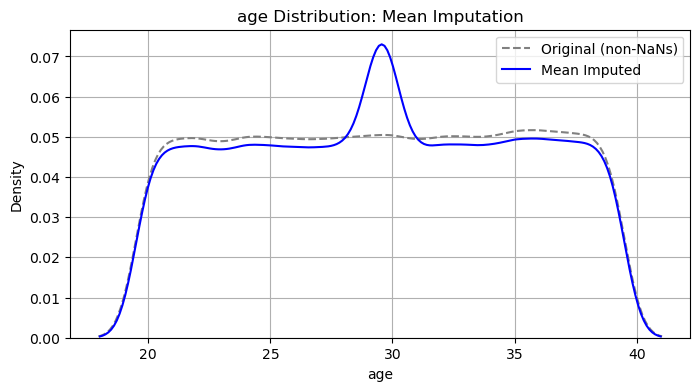

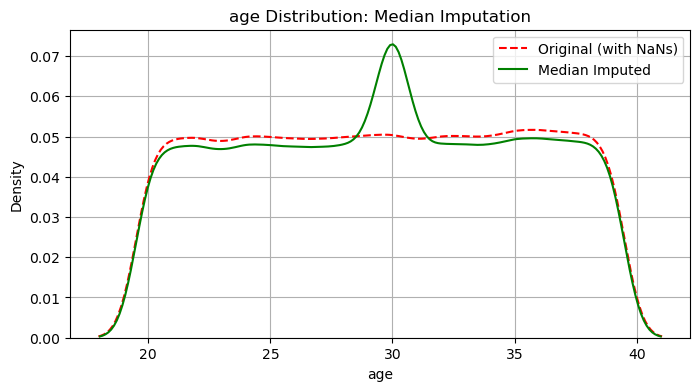

In [36]:
impute_mean(df1,'age')
impute_median(df1,'age')

C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

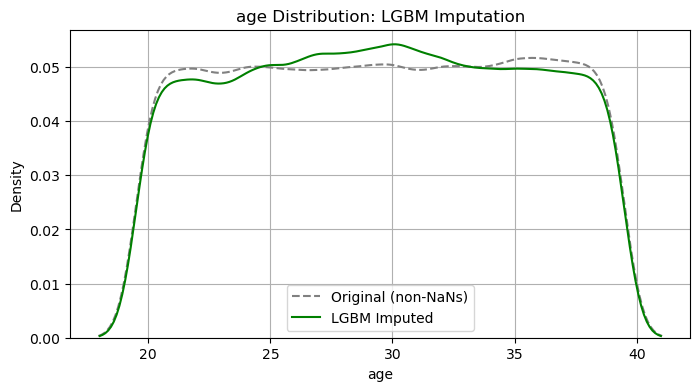

Time taken for LGBM imputation: 26.55 seconds


C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

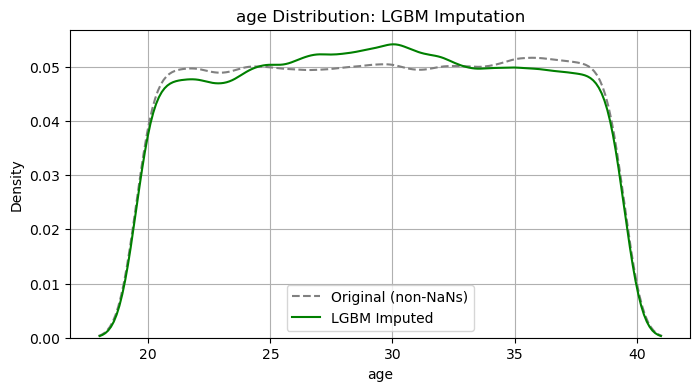

Time taken for LGBM imputation: 65.17 seconds


In [37]:
impute_iterative_lgbm(df1 ,'age')
impute_iterative_lgbm(df1 ,'age',n_estimators=300)

C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

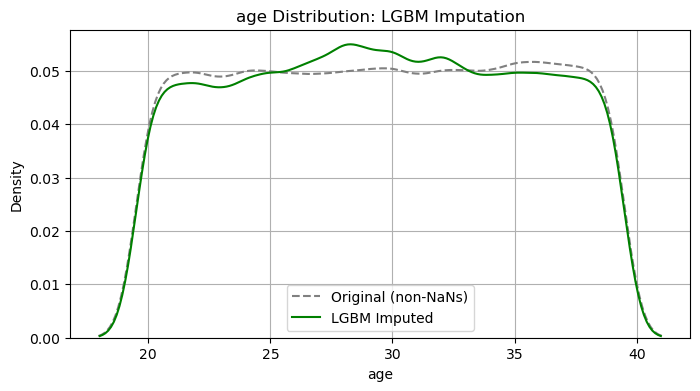

Time taken for LGBM imputation: 12.60 seconds


C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

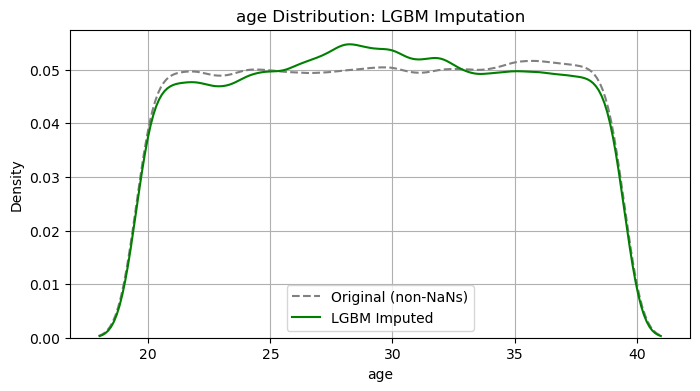

Time taken for LGBM imputation: 14.19 seconds


In [38]:
impute_iterative_lgbm(df1 ,'age',n_estimators=200 ,num_cols=['age','ratings','time_taken','pickup_time',
                                                             'order_time_hour','distance'])

impute_iterative_lgbm(df1 ,'age',n_estimators=300,num_cols=['age','ratings','time_taken','pickup_time',
                                                             'order_time_hour','distance'])

I have tried lgbm imputation on only related missing value columns num_cols= ['age','ratings','time_taken','pickup_time','order_time_hour','distance'] , but there is no improvement
on imputataion      

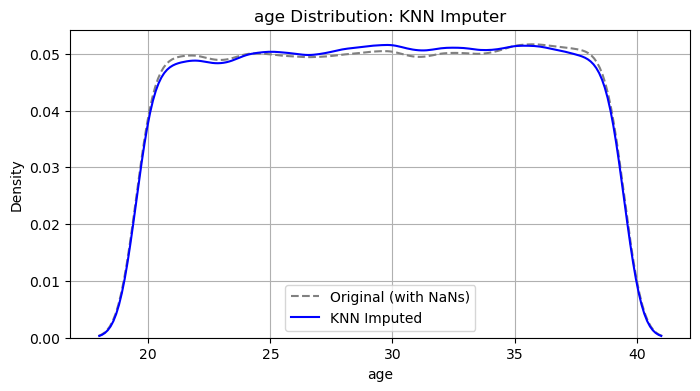

Time taken for KNN Imputer: 29.19 seconds


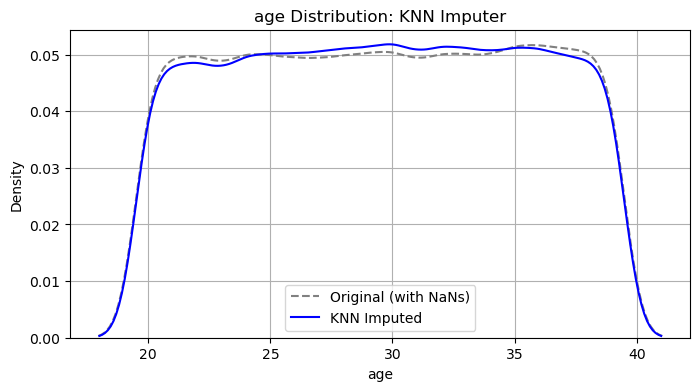

Time taken for KNN Imputer: 33.78 seconds


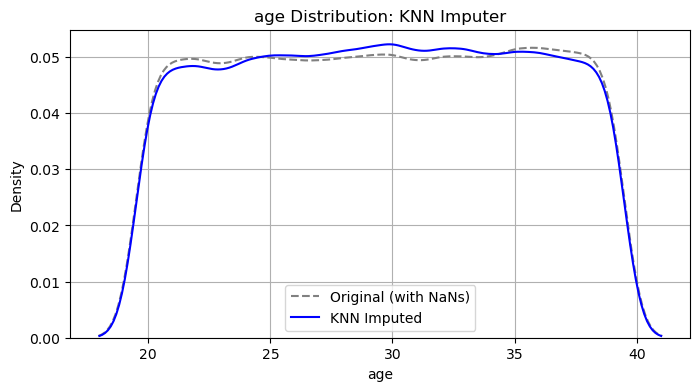

Time taken for KNN Imputer: 23.04 seconds


In [39]:
impute_knn(df1 ,'age',n_neighbors=3,)
impute_knn(df1 ,'age')
impute_knn(df1 ,'age',n_neighbors=7)



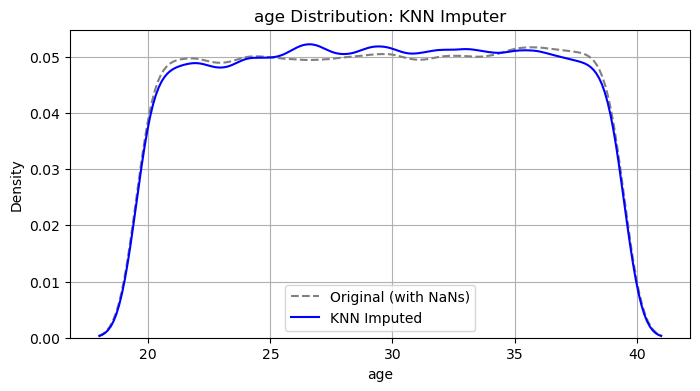

Time taken for KNN Imputer: 17.86 seconds


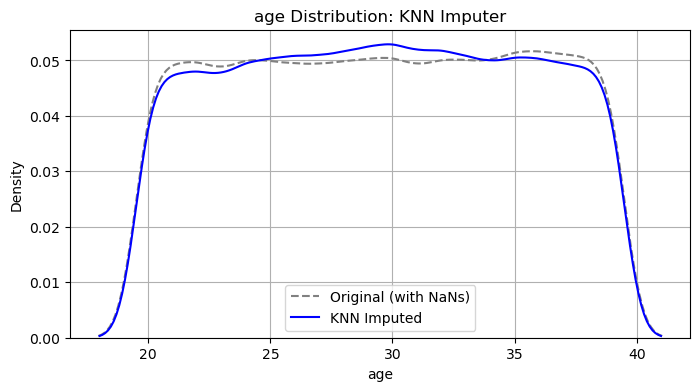

Time taken for KNN Imputer: 19.88 seconds


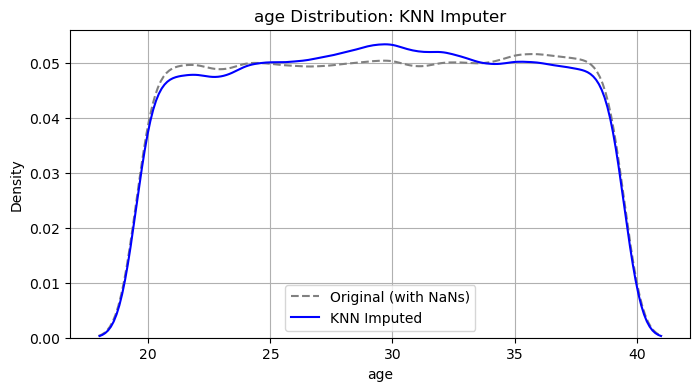

Time taken for KNN Imputer: 19.89 seconds


In [40]:
impute_knn(df1 ,'age',n_neighbors=3,num_cols=['age','ratings','time_taken','pickup_time',
                                                             'order_time_hour','distance'])
impute_knn(df1 ,'age',num_cols=['age','ratings','time_taken','pickup_time',
                                                             'order_time_hour','distance'])
impute_knn(df1 ,'age',n_neighbors=7,num_cols=['age','ratings','time_taken','pickup_time',
                                                             'order_time_hour','distance'])


I have tried knn imputation on only related missing value columns num_cols= ['age','ratings','time_taken','pickup_time','order_time_hour','distance'] , but there is no improvement
on imputataion       

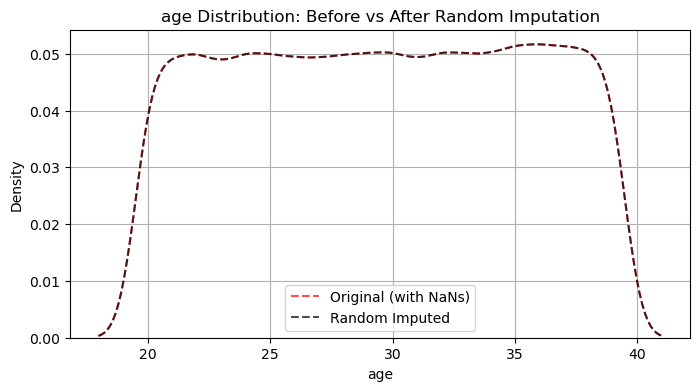

In [41]:
random_imputation(df1, 'age')

# Ratings Imputation

In [42]:
df1['ratings'].isnull().sum()

1908

In [43]:
corr_with_ratings = corr_matrix['ratings'].abs().sort_values(ascending=False)
corr_with_ratings

ratings                1.000000
time_taken             0.360980
multiple_deliveries    0.126573
age                    0.117577
distance               0.108677
order_time_hour        0.061775
vehicle_condition      0.048903
month                  0.005952
day                    0.005587
pickup_time            0.004083
is_weekend             0.001346
Name: ratings, dtype: float64

### time_taken has a moderate correlation (~0.36) with ratings.

In [44]:
df1['ratings'].value_counts()

4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: ratings, dtype: int64

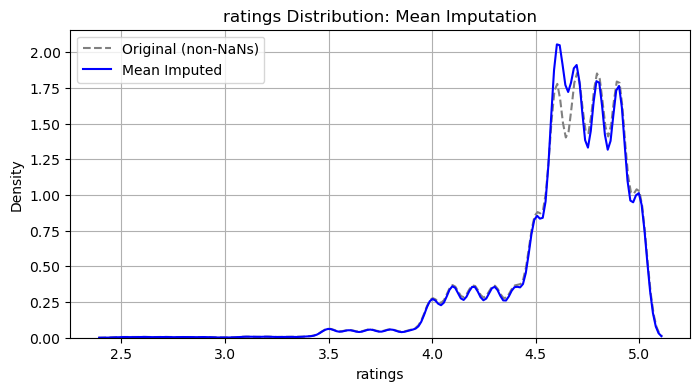

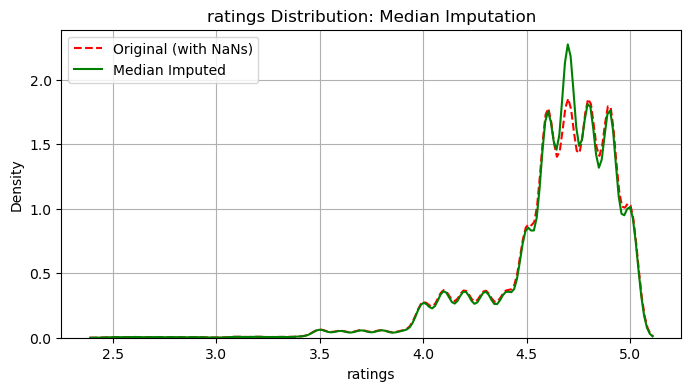

In [45]:
impute_mean(df1,'ratings')
impute_median(df1,'ratings')

C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

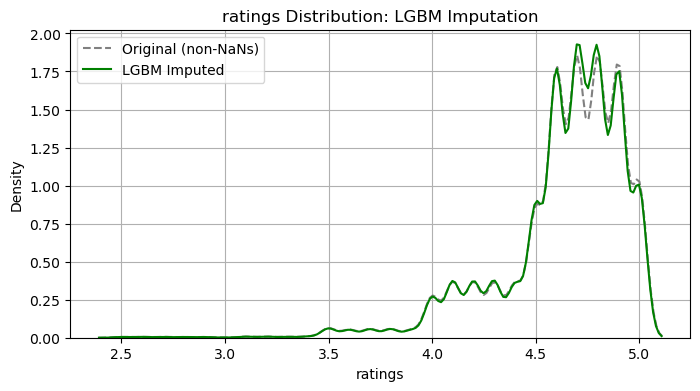

Time taken for LGBM imputation: 15.26 seconds


C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

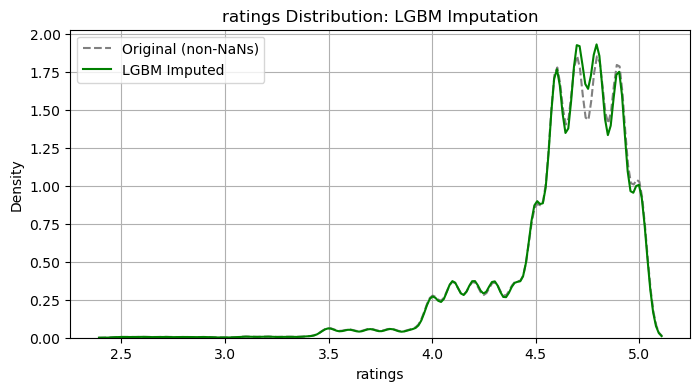

Time taken for LGBM imputation: 18.78 seconds


C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

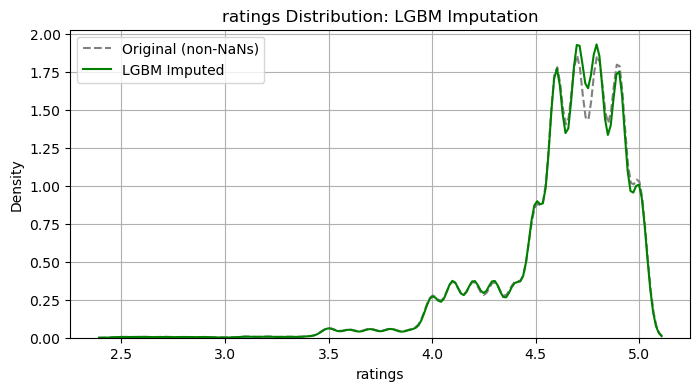

Time taken for LGBM imputation: 48.75 seconds


In [46]:
impute_iterative_lgbm(df1 ,'ratings')
impute_iterative_lgbm(df1 ,'ratings',n_estimators=500)
impute_iterative_lgbm(df1 ,'ratings',n_estimators=300)

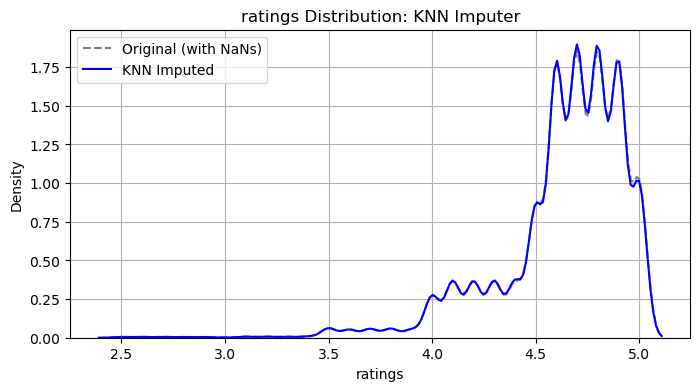

Time taken for KNN Imputer: 21.50 seconds


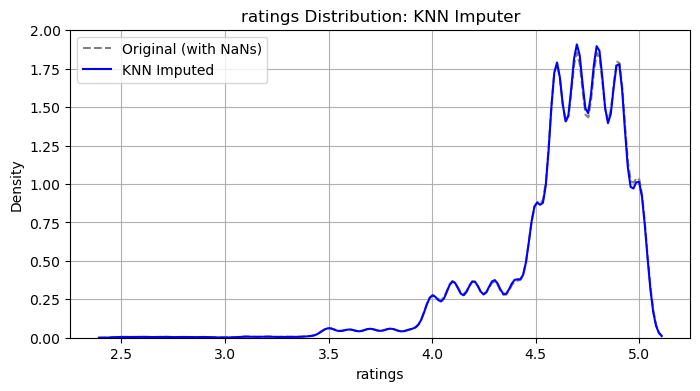

Time taken for KNN Imputer: 22.90 seconds


In [47]:

impute_knn(df1 ,'ratings',n_neighbors=3)
impute_knn(df1 ,'ratings',n_neighbors=5)

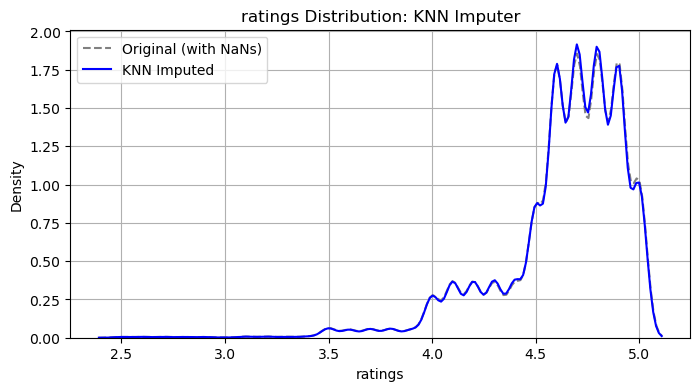

Time taken for KNN Imputer: 22.59 seconds


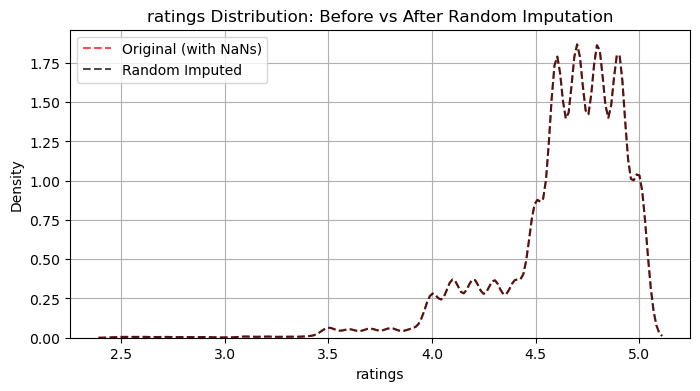

In [48]:
impute_knn(df1 ,'ratings',n_neighbors=7)
random_imputation(df1, 'ratings')

# Vehicle Condition Imputation

In [49]:
df1['vehicle_condition'].isnull().sum()

0

In [50]:
df1.isnull().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
day                       0
month                     0
day_of_week               0
is_weekend                0
pickup_time            1640
order_time_hour        1640
order_time_of_day      1640
distance               3630
dtype: int64

In [51]:
num_cols

['age',
 'ratings',
 'vehicle_condition',
 'multiple_deliveries',
 'time_taken',
 'day',
 'month',
 'is_weekend',
 'pickup_time',
 'order_time_hour',
 'distance']

# Multiple Deliveries Imputation

In [52]:
df1['multiple_deliveries'].isnull().sum()

993

In [53]:
df1['multiple_deliveries'].value_counts()

1.0    28109
0.0    14057
2.0     1982
3.0      361
Name: multiple_deliveries, dtype: int64

In [54]:
corr_with_delivery = corr_matrix['multiple_deliveries'].abs().sort_values(ascending=False)
corr_with_delivery

multiple_deliveries    1.000000
time_taken             0.387231
ratings                0.126573
distance               0.124190
age                    0.117832
vehicle_condition      0.096829
order_time_hour        0.067951
day                    0.015371
month                  0.011130
pickup_time            0.004466
is_weekend             0.003693
Name: multiple_deliveries, dtype: float64

### time_taken shows a moderate positive correlation (0.39) with multiple_deliveries

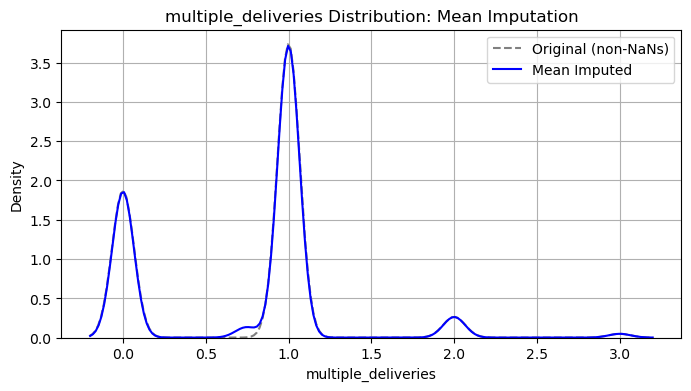

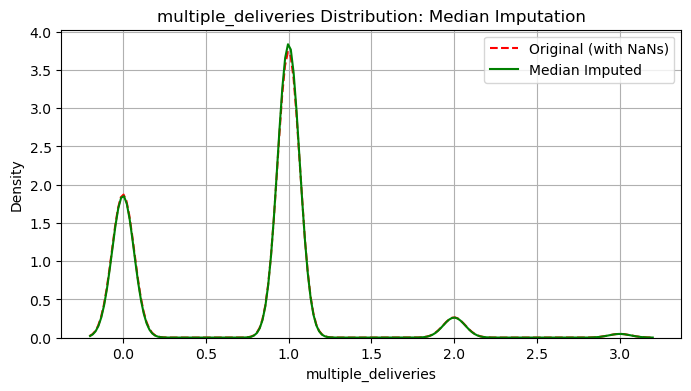

In [55]:
impute_mean(df1,'multiple_deliveries')
impute_median(df1,'multiple_deliveries')

C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

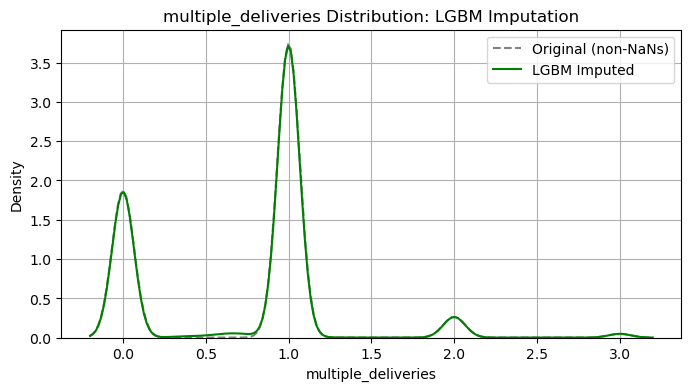

Time taken for LGBM imputation: 20.23 seconds


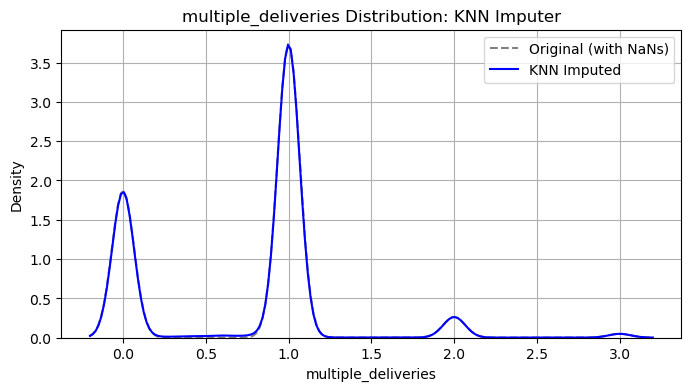

Time taken for KNN Imputer: 23.09 seconds


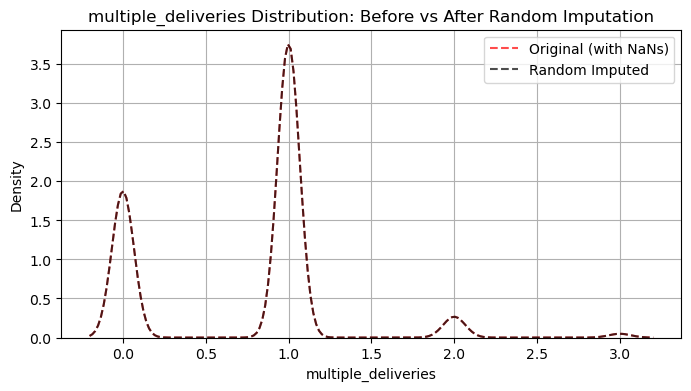

In [56]:
impute_iterative_lgbm(df1 ,'multiple_deliveries')
impute_knn(df1 ,'multiple_deliveries')
random_imputation(df1, 'multiple_deliveries')

# Time Taken , Day , Month , Year , Is_Weekend Imputation

In [57]:
num_cols

['age',
 'ratings',
 'vehicle_condition',
 'multiple_deliveries',
 'time_taken',
 'day',
 'month',
 'is_weekend',
 'pickup_time',
 'order_time_hour',
 'distance']

In [59]:
df1[['time_taken','day','month','is_weekend']].isnull().sum()

time_taken    0
day           0
month         0
is_weekend    0
dtype: int64

# Pickup Time Imputation

In [60]:

df1['pickup_time'].isnull().sum()


1640

In [61]:
corr_with_pickup = corr_matrix['pickup_time'].abs().sort_values(ascending=False)
corr_with_pickup

pickup_time            1.000000
time_taken             0.008478
age                    0.008163
vehicle_condition      0.005877
multiple_deliveries    0.004466
ratings                0.004083
is_weekend             0.003082
order_time_hour        0.002683
month                  0.002564
day                    0.001656
distance               0.000603
Name: pickup_time, dtype: float64

### pickup_time has very weak correlations with all other numerical variables in the dataset.

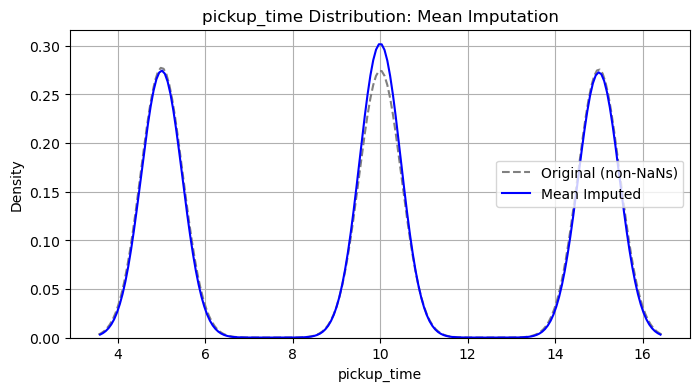

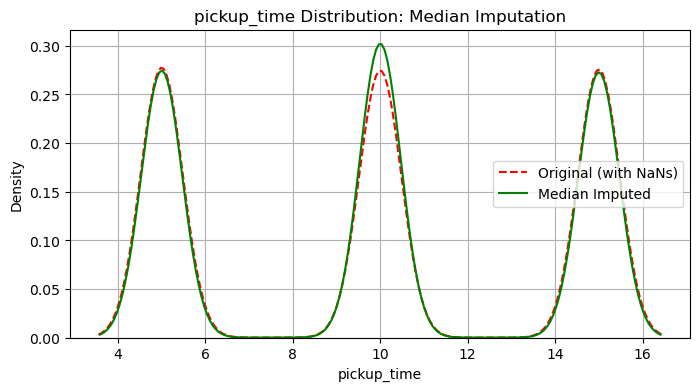

In [62]:
impute_mean(df1,'pickup_time')
impute_median(df1,'pickup_time')

C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

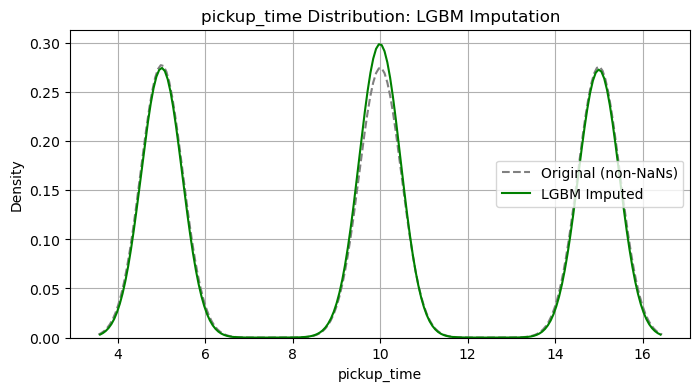

Time taken for LGBM imputation: 14.13 seconds


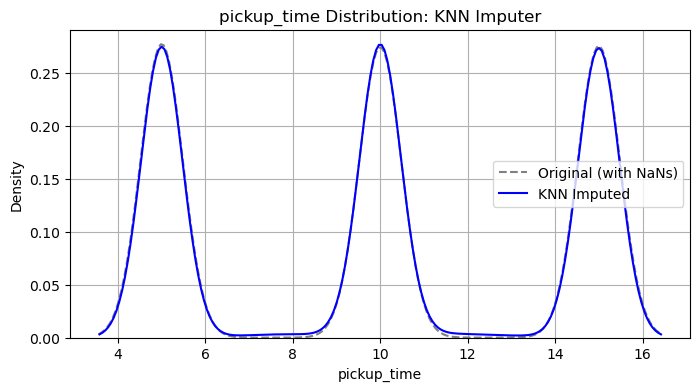

Time taken for KNN Imputer: 23.69 seconds


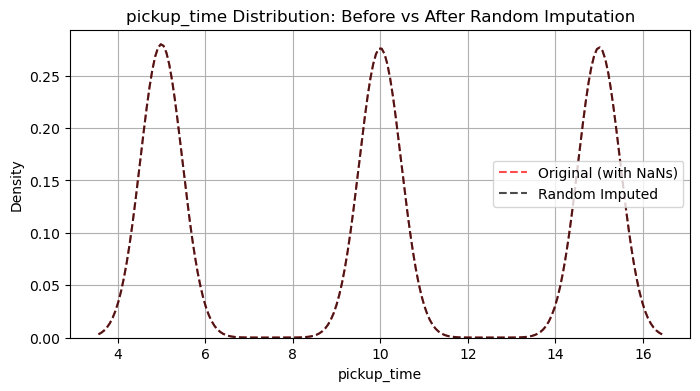

In [63]:
impute_iterative_lgbm(df1 ,'pickup_time')
impute_knn(df1 ,'pickup_time')
random_imputation(df1, 'pickup_time')

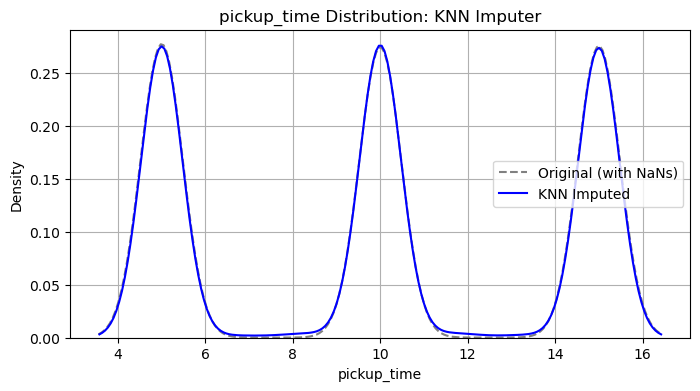

Time taken for KNN Imputer: 19.65 seconds


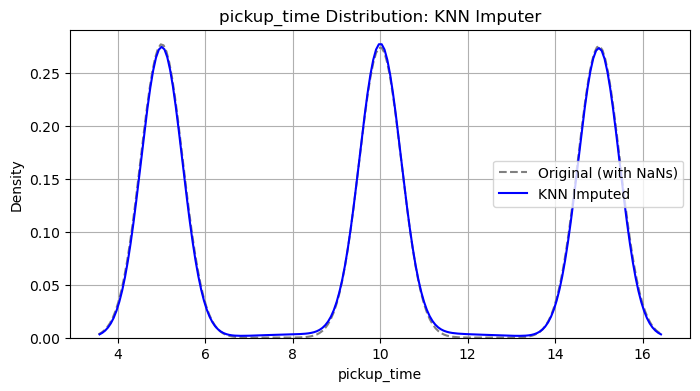

Time taken for KNN Imputer: 22.58 seconds


In [64]:
impute_knn(df1 ,'pickup_time',n_neighbors=3)
impute_knn(df1 ,'pickup_time',n_neighbors=7)

# Order Time Hour Imputation

In [65]:
df1['order_time_hour'].isnull().sum()

1640

In [66]:
corr_with_order_time = corr_matrix['order_time_hour'].abs().sort_values(ascending=False)
corr_with_order_time

order_time_hour        1.000000
distance               0.577351
time_taken             0.184378
multiple_deliveries    0.067951
ratings                0.061775
day                    0.030836
is_weekend             0.007562
month                  0.006509
pickup_time            0.002683
vehicle_condition      0.002628
age                    0.000410
Name: order_time_hour, dtype: float64

### distance (0.577) has a moderate-to-strong positive correlation with order_time_hour.
This suggests that orders placed later in the day tend to cover longer distances, possibly due to traffic, route preferences

time_taken (0.18), multiple_deliveries (0.07), and ratings (0.06) show weak positive associations, implying that:
Later order times might slightly increase delivery duration or chances of multiple deliveries.

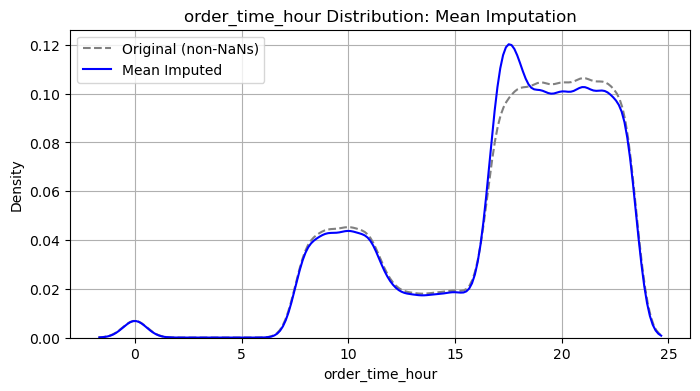

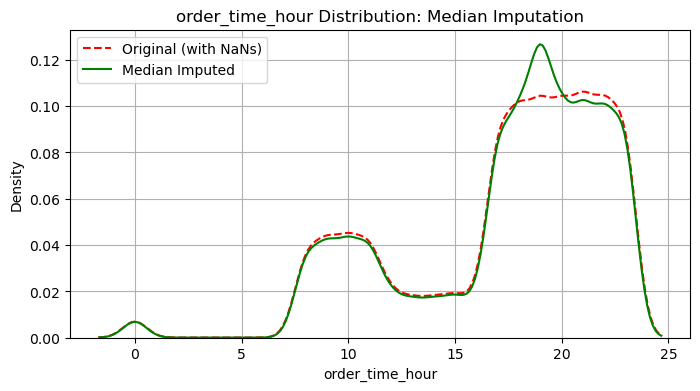

In [67]:
impute_mean(df1,'order_time_hour')
impute_median(df1,'order_time_hour')

C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

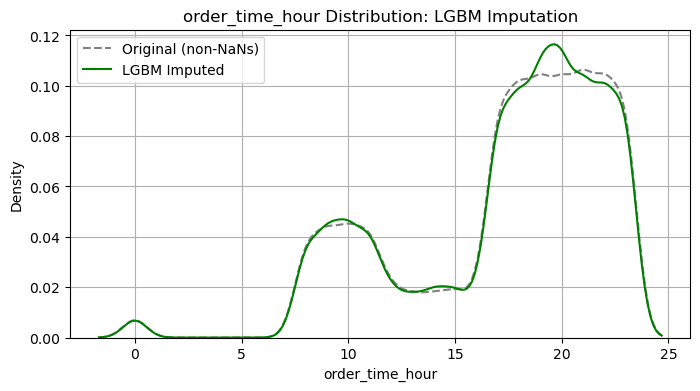

Time taken for LGBM imputation: 14.67 seconds


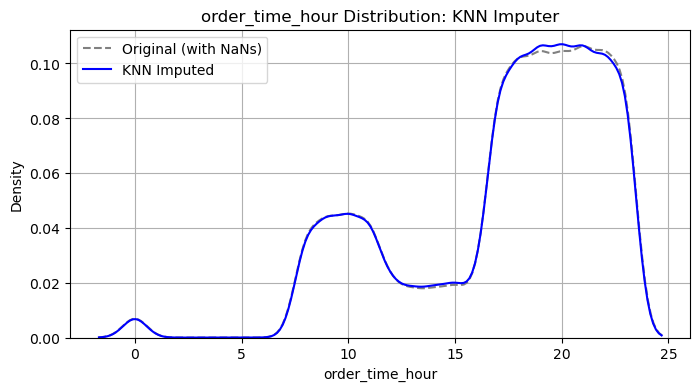

Time taken for KNN Imputer: 23.08 seconds


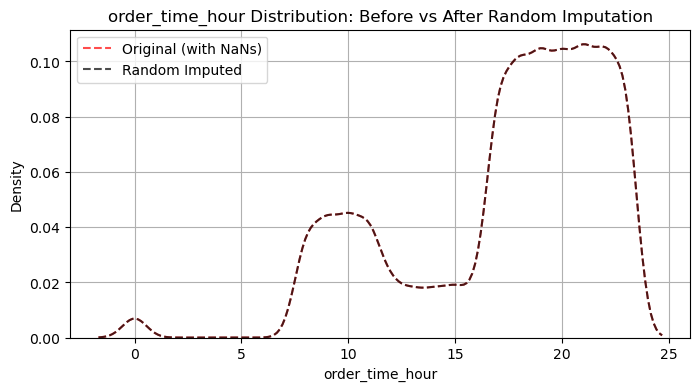

In [68]:
impute_iterative_lgbm(df1 ,'order_time_hour')
impute_knn(df1 ,'order_time_hour')
random_imputation(df1, 'order_time_hour')

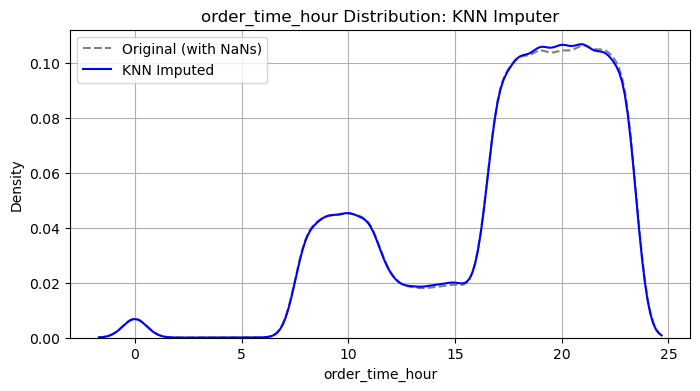

Time taken for KNN Imputer: 20.92 seconds


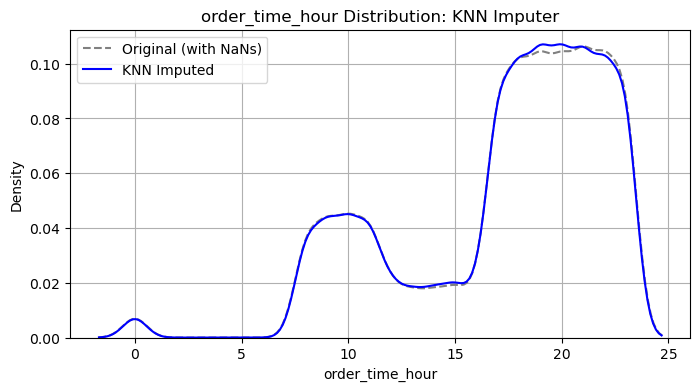

Time taken for KNN Imputer: 23.71 seconds


In [69]:
impute_knn(df1 ,'order_time_hour',n_neighbors=3)
impute_knn(df1 ,'order_time_hour',n_neighbors=7)

# Distance Imputation

In [70]:
df1['distance'].isnull().sum()

3630

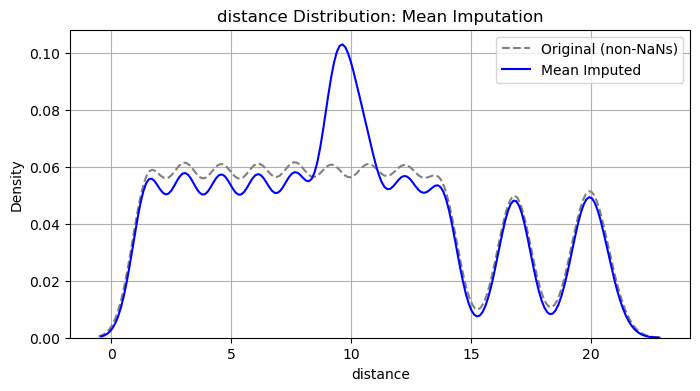

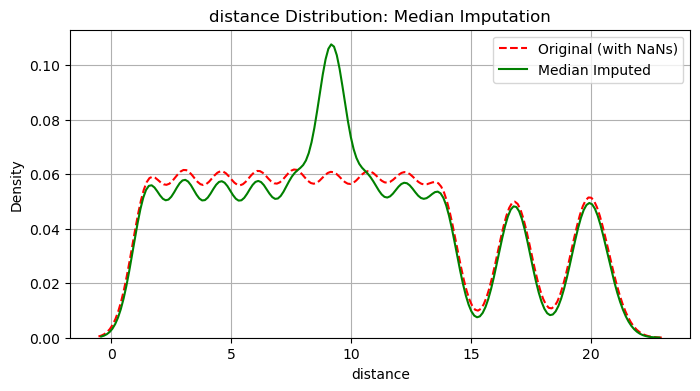

In [71]:
impute_mean(df1,'distance')
impute_median(df1,'distance')

C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\vkyad\anaconda3\lib\site-packag

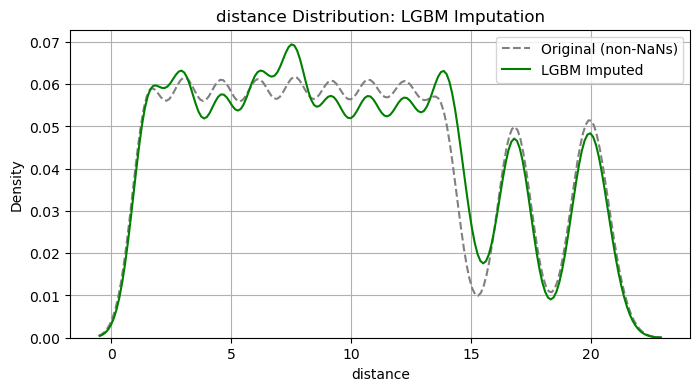

Time taken for LGBM imputation: 15.72 seconds


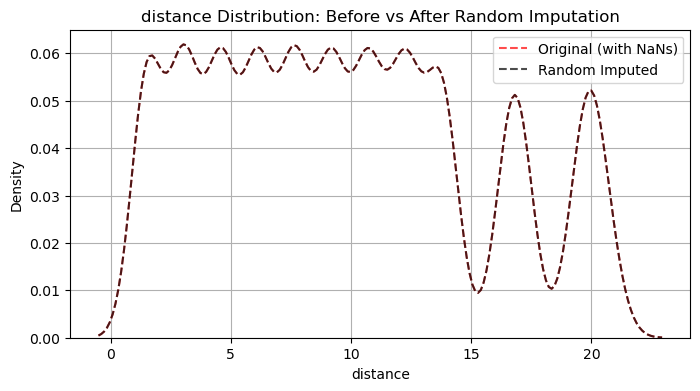

In [72]:
impute_iterative_lgbm(df1 ,'distance')
random_imputation(df1, 'distance')

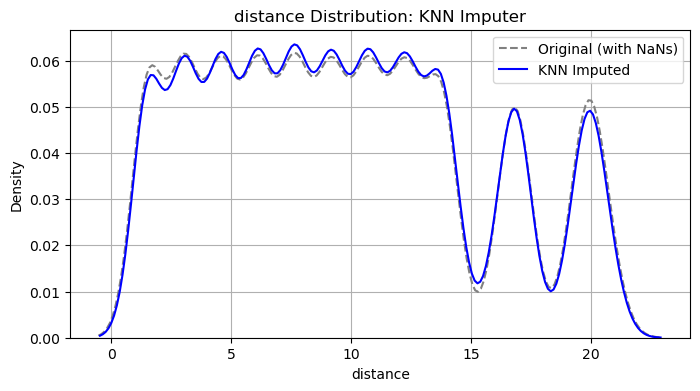

Time taken for KNN Imputer: 20.78 seconds


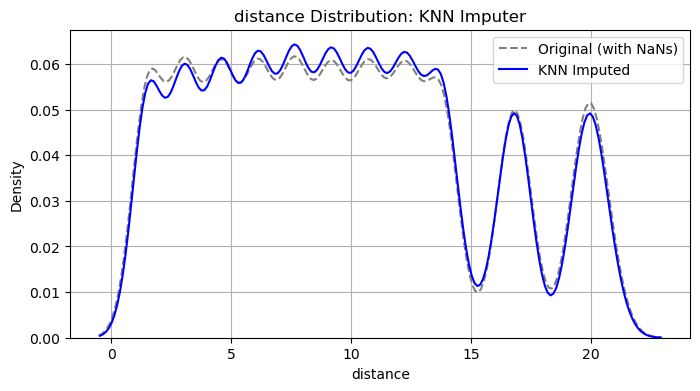

Time taken for KNN Imputer: 23.68 seconds


In [73]:
impute_knn(df1 ,'distance',n_neighbors=3)
impute_knn(df1 ,'distance',n_neighbors=5)

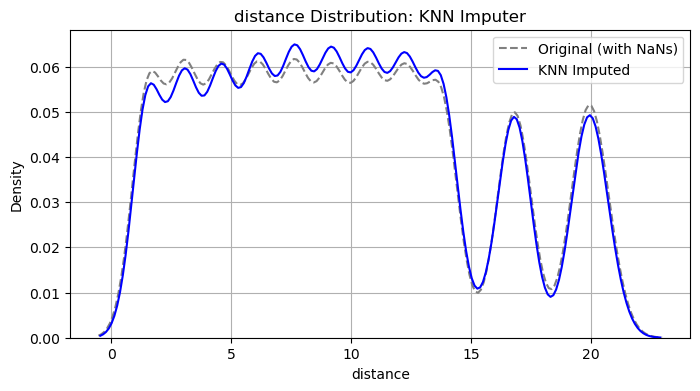

Time taken for KNN Imputer: 22.82 seconds


In [74]:
impute_knn(df1 ,'distance',n_neighbors=7)

In [75]:
def impute_combined(df, iterative_cols=None, knn_cols=None, mean_cols=None, median_cols=None, mode_cols=None, random_cols=None, 
                    num_cols=None, cat_cols=None, random_state=42, plot=True, show_time=True, return_df=True):

    start_time = time.time()
 
    
    # Select columns to impute
    if num_cols is None:
        num_cols = [col for col in df1.columns.to_list() if df1[col].dtype != 'object']
        
    if cat_cols is None:   
        cat_cols = [col for col in df1.columns.to_list() if df[col].dtype == 'object']
        
        
    df_copy_num = df[num_cols].copy()
    df_copy_cat = df[cat_cols].copy()
    df_imputed = df.copy()
    
    # ---------- iterative Imputation ----------
    if iterative_cols:
        lgbm_estimator = LGBMRegressor(n_estimators=300,learning_rate=0.02,random_state=42,verbose=-1)
        imp = IterativeImputer(estimator=lgbm_estimator,initial_strategy='median',tol=1e-1,max_iter=10,verbose=0,
                                random_state=0)

        iterative_imputed_array = imp.fit_transform(df_copy_num)
        iterative_imputed_df = pd.DataFrame(iterative_imputed_array, columns=df_copy_num.columns, index=df.index)
        
        for col in iterative_cols:
            df_imputed[col] = iterative_imputed_df[col]

    # ---------- KNN Imputation ----------
    if knn_cols:
        knn_imputer = KNNImputer(n_neighbors=3, weights='distance')
        knn_imputed_array = knn_imputer.fit_transform(df_copy_num)
        knn_imputed_df = pd.DataFrame(knn_imputed_array, columns=df_copy_num.columns, index=df.index)
        
        for col in knn_cols:
            df_imputed[col] = knn_imputed_df[col]
            
    # ---------- Mean Imputation ----------
    if mean_cols:
        for col in mean_cols:
            mean_val = df_copy_num[col].mean()
            df_imputed[col] = df_imputed[col].fillna(mean_val)

    # ---------- Median Imputation ----------
    if median_cols:
        for col in median_cols:
            median_val = df_copy_num[col].median()
            df_imputed[col] = df_imputed[col].fillna(median_val)
            
    # ---------- Mode Imputation ----------
    if mode_cols:
        for col in mode_cols:
            mode_val = df_copy_cat[col].mode().iloc[0]
            df_imputed[col] = df_imputed[col].fillna(mode_val)

    # ---------- Random Imputation ----------
    if random_cols:
        np.random.seed(random_state)
        for col in random_cols:
            missing_mask = df_copy_num[col].isnull()
            non_null_values = df_copy_num[col].dropna()
            if missing_mask.sum() > 0:
                sampled_values = np.random.choice(non_null_values, size=missing_mask.sum(), replace=True)
                df_imputed.loc[missing_mask, col] = sampled_values

    # ---------- Plotting ----------
    if plot:
        
        for col in num_cols:
            plt.figure(figsize=(8, 4))
            if df[col].isnull().sum()>0:
                
                sns.kdeplot(df[col], label=f'Original {col}', linestyle='--', color='red')
                sns.kdeplot(df_imputed[col], label=f'Imputed {col}', color='blue')
                plt.title(f"{col} - Imputed Distribution")
                plt.legend()
                plt.grid(True)
                plt.show()
                
            else:
                print(f'{col} has no null values')
                plt.figure(figsize=(8, 4))
                sns.kdeplot(df[col], label=f'Original {col}', linestyle='--', color='red')
                plt.title(f"{col} - Distribution")
                plt.legend()
                plt.grid(True)
                plt.show()
                
        for col in cat_cols:
            sns.set_style("whitegrid")
            plt.figure(figsize=(8, 4))
            if df[col].isnull().sum()>0:
                
                sns.countplot(x=df[col], color='red', alpha=0.6, label='Original (w/ NaNs)',palette='Set2',edgecolor='black')
                sns.countplot(x=df_imputed[col], color='blue', alpha=0.4, label='Imputed',palette='Set2',edgecolor='black')
                plt.title(f"{col} - Categorical Imputed Distribution")
                plt.legend()
                #plt.grid(True)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
                
            else:
                print(f'{col} has no null values')
                plt.figure(figsize=(8, 4))
                sns.countplot(x=df[col], color='red', label='Original (w/ NaNs)',palette='Set2',edgecolor='black')
                plt.title(f"{col} - Distribution")
                plt.legend()
                #plt.grid(True)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
                

    # ---------- Timing Info ----------
    if show_time:
        print(f"\nTotal Imputation Time: {time.time() - start_time:.2f} seconds")

    if return_df:
        df_imputed['age'] = df_imputed['age'].round(1)
        df_imputed['ratings'] = df_imputed['ratings'].round(1)
        df_imputed['pickup_time'] = df_imputed['pickup_time'].round(1)
        df_imputed['order_time_hour'] = df_imputed['order_time_hour'].round(2)
        df_imputed['distance'] = df_imputed['distance'].round(2)
        return df_imputed


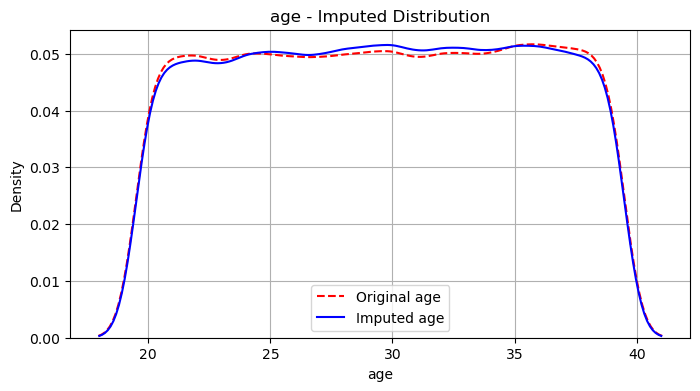

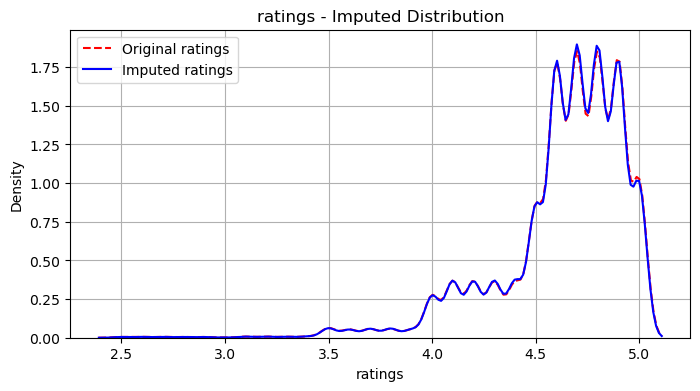

vehicle_condition has no null values


<Figure size 800x400 with 0 Axes>

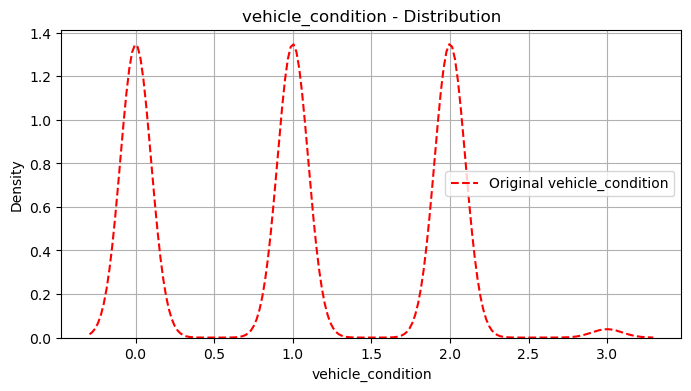

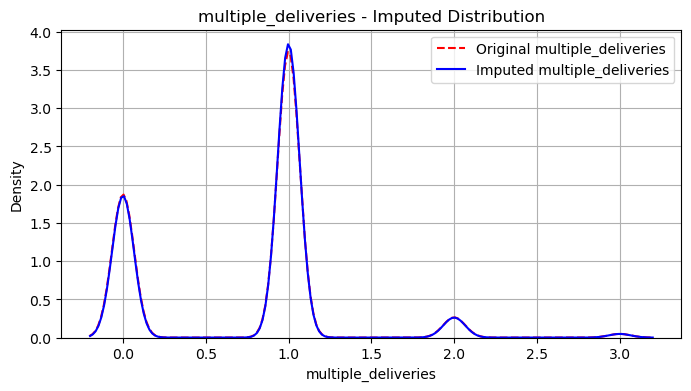

time_taken has no null values


<Figure size 800x400 with 0 Axes>

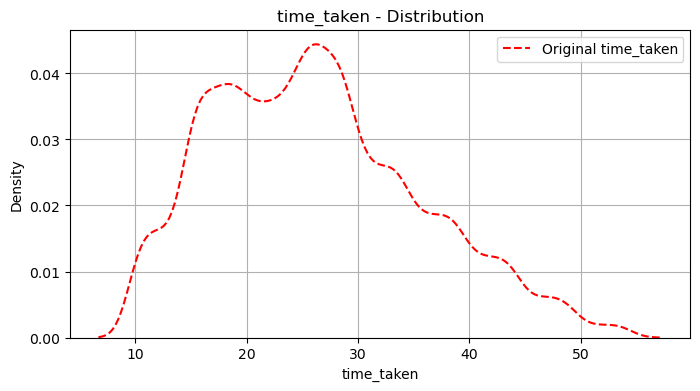

day has no null values


<Figure size 800x400 with 0 Axes>

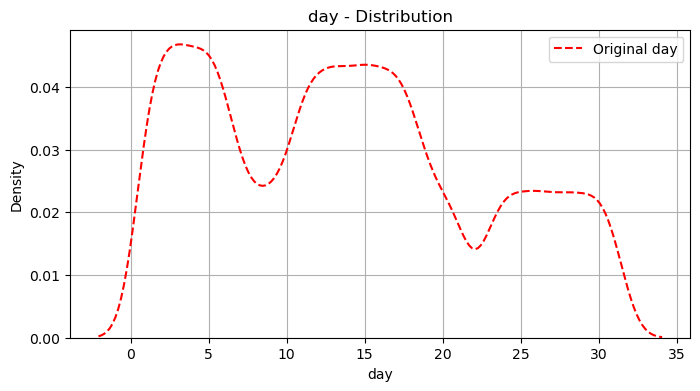

month has no null values


<Figure size 800x400 with 0 Axes>

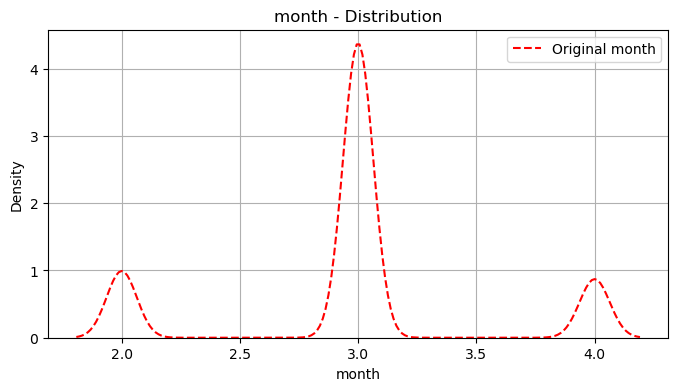

is_weekend has no null values


<Figure size 800x400 with 0 Axes>

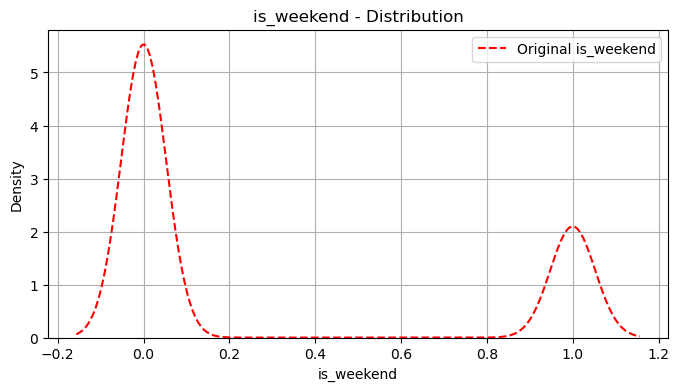

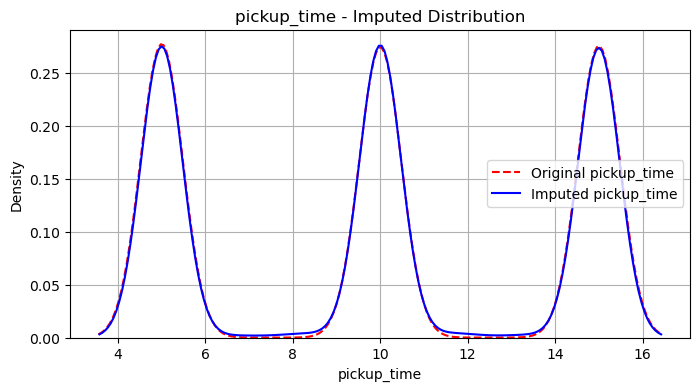

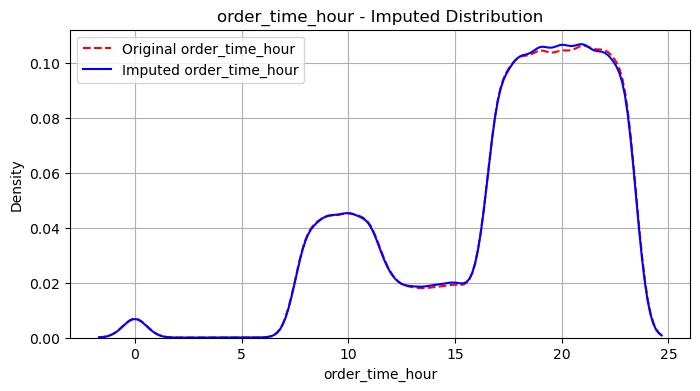

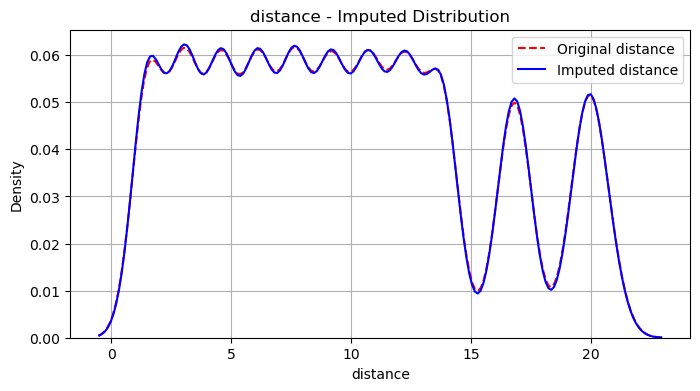

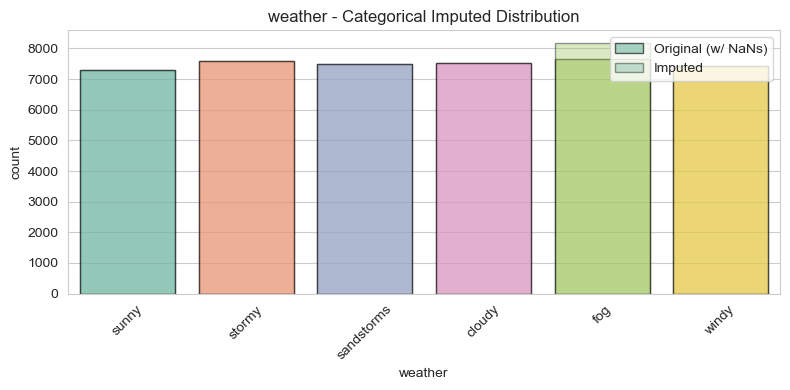

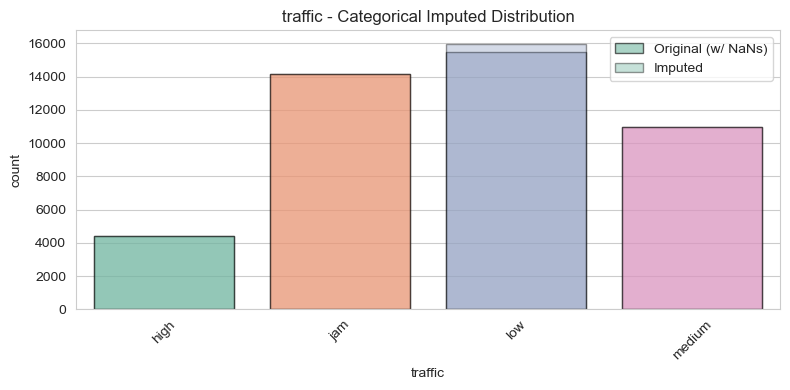

type_of_order has no null values


<Figure size 800x400 with 0 Axes>

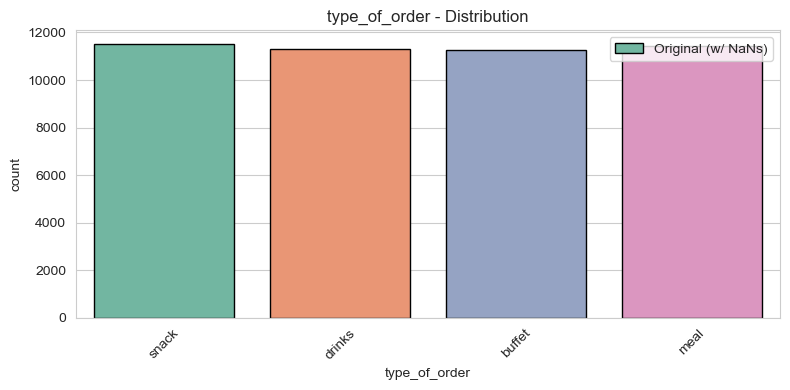

type_of_vehicle has no null values


<Figure size 800x400 with 0 Axes>

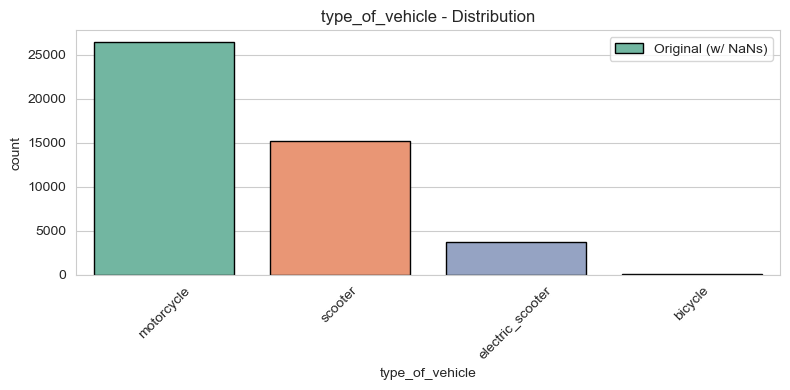

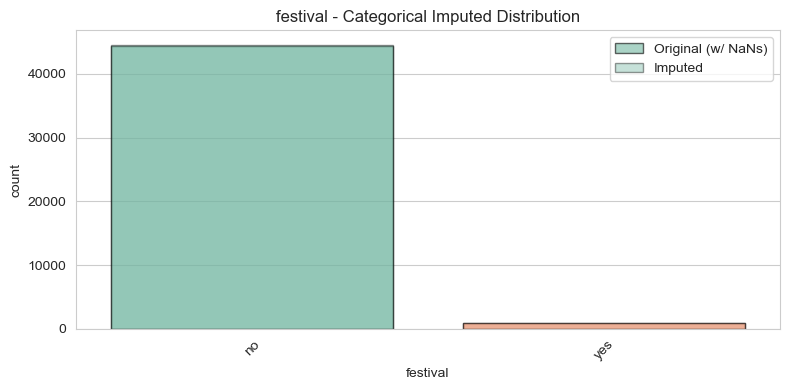

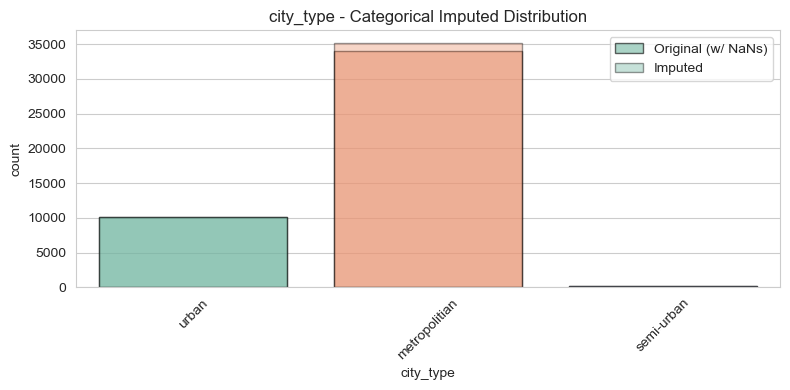

city_name has no null values


<Figure size 800x400 with 0 Axes>

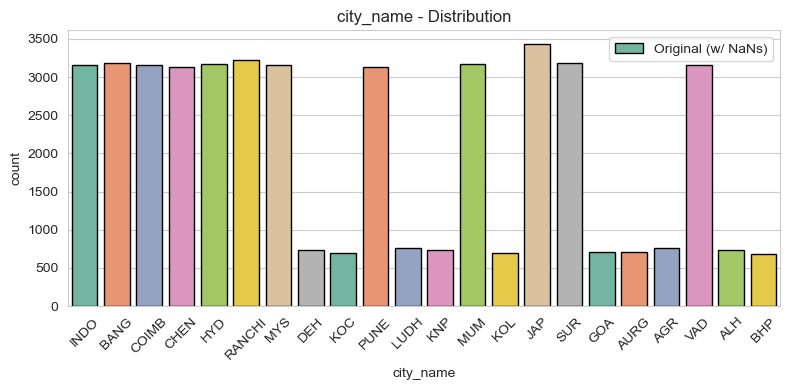

day_of_week has no null values


<Figure size 800x400 with 0 Axes>

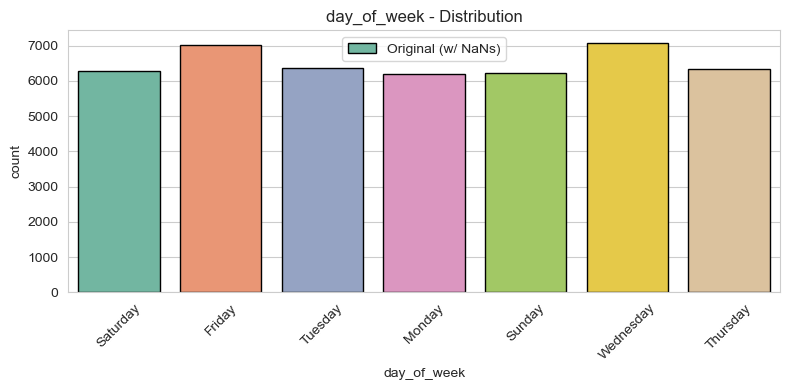

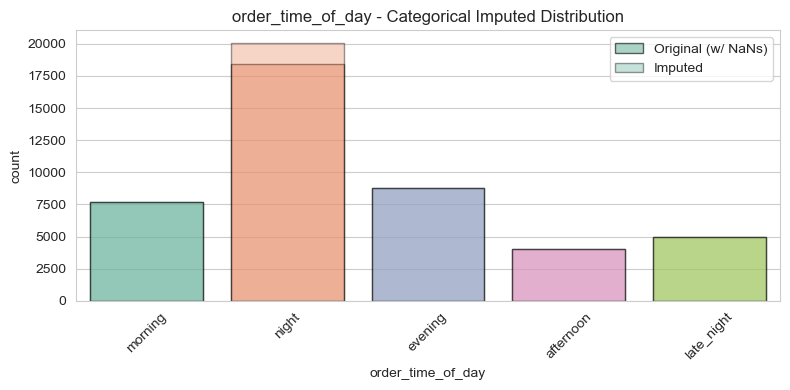


Total Imputation Time: 5797.74 seconds


In [76]:
df_imputed = impute_combined(df1,knn_cols=['age','ratings','pickup_time','order_time_hour'],
                                 median_cols=['multiple_deliveries'],
                                 random_cols=['distance'],
                                 mode_cols=['weather','traffic','festival','city_type','order_time_of_day'])

In [77]:
df_imputed.isnull().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
time_taken             0
city_name              0
day                    0
month                  0
day_of_week            0
is_weekend             0
pickup_time            0
order_time_hour        0
order_time_of_day      0
distance               0
dtype: int64

In [78]:
df1.isnull().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
day                       0
month                     0
day_of_week               0
is_weekend                0
pickup_time            1640
order_time_hour        1640
order_time_of_day      1640
distance               3630
dtype: int64

In [79]:
df_imputed.sample(100)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
29854,35.0,5.0,sunny,jam,2,snack,electric_scooter,1.0,no,urban,25.0,RANCHI,20,3,Sunday,True,5.0,21.00,night,19.62
39688,31.0,4.7,windy,low,1,buffet,motorcycle,1.0,no,urban,25.0,RANCHI,2,4,Saturday,True,15.0,23.00,late_night,10.57
3502,20.0,4.8,fog,low,1,drinks,scooter,0.0,no,urban,10.0,MYS,17,3,Thursday,False,5.0,10.00,morning,3.11
38848,30.0,4.7,sunny,medium,1,meal,scooter,1.0,no,urban,22.0,KOL,14,2,Monday,False,10.0,17.00,evening,19.68
30167,37.0,4.5,cloudy,low,2,meal,scooter,0.0,no,metropolitian,37.0,CHEN,20,3,Sunday,True,10.0,23.00,late_night,20.18
33863,29.0,4.7,sandstorms,high,1,buffet,motorcycle,1.0,no,urban,14.0,AGR,11,2,Friday,False,10.0,13.00,afternoon,5.95
26158,39.0,4.5,cloudy,low,1,meal,motorcycle,1.0,no,urban,31.0,INDO,23,3,Wednesday,False,5.0,22.00,night,12.10
35106,28.0,4.7,fog,medium,0,drinks,motorcycle,0.0,no,metropolitian,20.0,JAP,11,3,Friday,False,10.0,16.00,afternoon,5.96
1406,36.8,4.8,cloudy,low,2,meal,electric_scooter,0.0,no,metropolitian,10.0,INDO,30,3,Wednesday,False,10.0,8.01,night,3.03
36393,39.0,4.9,cloudy,medium,1,drinks,motorcycle,1.0,no,urban,18.0,INDO,3,4,Sunday,True,5.0,15.00,afternoon,6.05


In [80]:
df1['weather'].mode().iloc[0]

'fog'

In [81]:
df_imputed.to_csv("swiggy_imputed_data.csv",index=False)

In [82]:
df2 = pd.read_csv('swiggy_imputed_data.csv')

In [83]:
df2.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,INDO,19,3,Saturday,True,15.0,11.0,morning,3.03
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,BANG,25,3,Friday,False,5.0,19.0,night,20.18
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,BANG,19,3,Saturday,True,15.0,8.0,morning,1.55
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,COIMB,5,4,Tuesday,False,10.0,18.0,evening,7.79
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,CHEN,26,3,Saturday,True,15.0,13.0,afternoon,6.21


In [84]:
df_imputed.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,INDO,19,3,Saturday,True,15.0,11.0,morning,3.03
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,BANG,25,3,Friday,False,5.0,19.0,night,20.18
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,BANG,19,3,Saturday,True,15.0,8.0,morning,1.55
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,COIMB,5,4,Tuesday,False,10.0,18.0,evening,7.79
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,CHEN,26,3,Saturday,True,15.0,13.0,afternoon,6.21


In [85]:
df_imputed.shape

(45502, 20)